# PROYECTO GYM

### El informe tendrá que seguir los pasos del análisis exploratorio de datos que veremos en la asignatura:

1. Introducción al dataset (resumen y explicación de los datos)

2. Detección y corrección de valores faltantes (missings) y outliers

3. Exploración de variables numéricas y categóricas

4. Relaciones y Correlaciones entre Variables

5. Análisis de tendencias temporales

6. Interpretación de los datos

7. Conclusiones y posibles siguientes pasos

8. Opcional:

• Usar otros datasets para enriquecer/mejorar el análisis

• Construcción de modelos estadísticos o de machine learning con los datos
trabajados

* Es importante usar distintos métodos de visualización en las diferentes etapas.



---


# I. Introducción al dataset (resumen y explicación de los datos)

## 1. Importación de los documentos y unión de los datasets

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/gym-data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/gym-data


In [ ]:
# Cargamos el archivo csv en un DataFrame
df_history = pd.read_csv("/content/drive/MyDrive/gym-data/users_history.csv", sep="," )

# Mostramos el tamaño del df
print("Tamaño df:\n", df_history.shape)

# Mostramos el nombre de las columnas
print("Columnas del df:\n", df_history.columns)

Tamaño df:
 (300000, 9)
Columnas del df:
 Index(['user_id', 'gym_id', 'checkin_time', 'checkout_time', 'workout_type',
       'calories_burned', 'location', 'gym_type', 'facilities'],
      dtype='object')


La presente base de datos es el histórico de usuarios que han ido alguna vez al gym y presenta un total de 300 000 registros y 9 variables. De las cuales tenemos las siguientes variables : user_id', 'gym_id', 'checkin_time', 'checkout_time', 'workout_type','calories_burned', 'location', 'gym_type' y 'facilities'.

In [ ]:
df_info = pd.read_csv("/content/drive/MyDrive/gym-data/users_info.csv", sep="," )
print("Tamaño df:\n", df_info.shape)
print("Columnas del df:\n", df_info.columns)

Tamaño df:
 (5000, 11)
Columnas del df:
 Index(['user_id', 'first_name', 'last_name', 'age', 'gender', 'birthdate',
       'sign_up_date', 'user_location', 'subscription_plan', 'price_per_month',
       'features'],
      dtype='object')


Esta otra base de datos tiene toda la información de los usuarios que han ido al gym. Tiene un total de 5 000 registros y 11 variables, las cuales son: 'user_id', 'first_name', 'last_name', 'age', 'gender', 'birthdate',        'sign_up_date', 'user_location', 'subscription_plan' y 'price_per_month'.

# II. Detección y corrección de valores faltantes (missings) y outliers

## Observamos las columnas de df_info

In [ ]:
df_info_copia= df_info.copy()

In [ ]:
df_info_copia.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'gender', 'birthdate',
       'sign_up_date', 'user_location', 'subscription_plan', 'price_per_month',
       'features'],
      dtype='object')

### Empezaremos unificando el formato de todas las columnas en `df_info_copia`.

In [ ]:
# Cambiamos los valores de las columnas a formato Title Case para tener los mismos formatos en todas las columnas texto
df_info_copia['user_id'] = df_info_copia['user_id'].str.title()
df_info_copia['first_name'] = df_info_copia['first_name'].str.title()
df_info_copia['last_name'] = df_info_copia['last_name'].str.title()
df_info_copia['gender'] = df_info_copia['gender'].str.title()
df_info_copia['user_location'] = df_info_copia['user_location'].str.title()
df_info_copia['subscription_plan'] = df_info_copia['subscription_plan'].str.title()
df_info_copia['features'] = df_info_copia['features'].str.title()

In [ ]:
df_info_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            5000 non-null   object 
 1   first_name         5000 non-null   object 
 2   last_name          5000 non-null   object 
 3   age                4884 non-null   float64
 4   gender             5000 non-null   object 
 5   birthdate          5000 non-null   object 
 6   sign_up_date       5000 non-null   object 
 7   user_location      5000 non-null   object 
 8   subscription_plan  5000 non-null   object 
 9   price_per_month    4803 non-null   object 
 10  features           5000 non-null   object 
dtypes: float64(1), object(10)
memory usage: 429.8+ KB


### Variable `first_name` y  `last_name`

Identificar si un usuario posee diferentes nombres y apellidos. El análisis de usuarios con múltiples nombres o apellidos es crucial para detectar errores en los datos, como duplicados o inconsistencias, que afectan la calidad y confiabilidad de la información. Esto permite optimizar procesos al garantizar registros únicos, prevenir fraudes, cumplir normativas legales y mejorar la segmentación de usuarios. Además, contribuye a decisiones más precisas y reduce costos asociados a la corrección de datos, impactando directamente en la eficiencia operativa y la personalización de servicios.

In [ ]:
# Agrupar por el identificador único del usuario y contar nombres y apellidos únicos
usuarios_con_nombres_diferentes = (
    df_info_copia.groupby('user_id')[['first_name', 'last_name']]
    .nunique()
    .reset_index()
)

# Filtrar usuarios con más de un conjunto de nombres y apellidos únicos
usuarios_multiples_nombres = usuarios_con_nombres_diferentes[
    (usuarios_con_nombres_diferentes['first_name'] > 1) |
    (usuarios_con_nombres_diferentes['last_name'] > 1)
]

# Ver resultados
print(usuarios_multiples_nombres)

Empty DataFrame
Columns: [user_id, first_name, last_name]
Index: []


In [ ]:
# Eliminar columnas específicas
columnas_a_eliminar = ['first_name', 'last_name']  # Cambia por los nombres de tus columnas
df_info_copia = df_info_copia.drop(columns=columnas_a_eliminar)

# Verificar que las columnas fueron eliminadas
df_info_copia.columns

Index(['user_id', 'age', 'gender', 'birthdate', 'sign_up_date',
       'user_location', 'subscription_plan', 'price_per_month', 'features'],
      dtype='object')

Se observa que por esa parte, los datos son correctos de esa columna. Y como no utilizaremos estas variables para análisis posteriores, procederemos a eliminarlas.

Hemos detectado que las columnas `first_name`y `last_name` se repiten para diferentes user_id, y por tanto, hemos eliminado estas dos columnas con tal de evitar confusiones. De este modo, basaremos nuestro análisis únicamente en la columna `user_id`.

### Variable `birthdate`

Analizando las fechas de la columna `birthdate`, hemos detectado que los separadores son el signo $ en lugar de /. Por este motivo, hemos corregido este error.

Ademas aseguramos que todas cumplen con el formato estándar 'YYYY/MM/DD'.

In [ ]:
# Reemplazamos $ con /
df_info_copia['birthdate'] = df_info_copia['birthdate'].str.replace('$', '/', regex=False)

In [ ]:
# Convertimos al formato datetime
df_info_copia['birthdate'] = pd.to_datetime(
    df_info_copia['birthdate'],
    format='%d/%m/%Y',
    errors='coerce',    # Maneja conversiones fallidas
    dayfirst=True       # Interpretar días primero
)

# Cambiamos el formato a 'año/mes/día'
df_info_copia['birthdate'] = df_info_copia['birthdate'].dt.strftime('%Y/%m/%d')

# Mostramos el resultado final
df_info_copia['birthdate']

,birthdate
0,2000/02/29
1,1978/12/22
2,1962/08/30
3,2003/12/05
4,2004/08/25
...,...
4995,1958/01/13
4996,1974/02/20
4997,1978/03/29
4998,2002/02/01


### Variable age

La columna `birthdate` está estrechamente ligada con la columna `age`. Sin embargo, al analizar una con la otra se puede ver que las edades no son coherentes con las fechas de nacimiento.

Ya que nuestros datos recogen registros del período entre enero y octubre del 2023, hemos decidido calcular la edad teniendo en cuenta la fecha de corte de los datos, es decir, la edad que tenían los usuarios el 1 de noviembre.

In [ ]:
df_info_copia[['birthdate','age']]

,birthdate,age
0,2000/02/29,56.0
1,1978/12/22,46.0
2,1962/08/30,32.0
3,2003/12/05,60.0
4,2004/08/25,25.0
...,...,...
4995,1958/01/13,33.0
4996,1974/02/20,22.0
4997,1978/03/29,38.0
4998,2002/02/01,27.0


In [ ]:
from datetime import datetime

# Birthdate está en formato de cadena así que la vamos a convertir a datetime
df_info_copia['birthdate'] = pd.to_datetime(df_info_copia['birthdate'], errors='coerce')

In [ ]:
# Definimos la fecha de referencia
fecha_referencia = pd.to_datetime('2023-11-01')

# Calculamos la edad
df_info_copia['new_age'] = df_info_copia['birthdate'].apply(
    lambda x: (fecha_referencia - x).days // 365 if pd.notnull(x) else None)

# Verificamos el resultado
print(df_info_copia[['birthdate', 'new_age']].head())


   birthdate  new_age
0 2000-02-29       23
1 1978-12-22       44
2 1962-08-30       61
3 2003-12-05       19
4 2004-08-25       19


In [ ]:
# Actualizamos la columna age con los valores correctos
df_info_copia['age'] = df_info_copia['new_age']

### Variable `gender`

Ahora vamos a revisar los valores que toma la columna `gender`. Al observar que los valores son distintos: ['Female' 'Non-Binary' 'Male' 'F' 'N' 'M']; decidimos agruparlos en F, M y N.

In [ ]:
unique_values_plan = df_info_copia['gender'].unique()
print(unique_values_plan)

['Female' 'Non-Binary' 'Male' 'F' 'N' 'M']


In [ ]:
# Limpiamos y estandarizamos la columna 'gender'
def standardize_gender(gender):
    if gender in ["Female", "F"]:
        return "F"
    elif gender in ["Male", "M"]:
        return "M"
    elif gender in ["Non-Binary", "N"]:
        return "N"
    else:
        return "Unknown"

# Aplicamos la función a la columna 'gender'
df_info_copia['gender'] = df_info_copia['gender'].apply(standardize_gender)

# Mostramos los valores únicos después de la estandarización
unique_values_plan = df_info_copia['gender'].unique()
print(unique_values_plan)

['F' 'N' 'M']


In [ ]:
# Agrupamos por 'gender' y contamos registros
gender_counts = df_info_copia.groupby('gender').size().reset_index(name='count')

# Mostramos los resultados
print(gender_counts)


  gender  count
0      F   2182
1      M   2328
2      N    490


### Variable `price_per_month`

Observamos que la variable `price_per_month` es una cadena de texto pero debería ser de tipo numérico.

In [ ]:
# Convertimos la columna 'price' a valores numéricos
df_info_copia['price_per_month'] = pd.to_numeric(df_info_copia['price_per_month'], errors='coerce')

Una vez corregida la cuestión del tipo de variables, hacemos un *describe* de las variables numéricas. Esto nos permitirá tener un punto de partida en la  detección de cualquier anomalía en caso de que existiera.

In [ ]:
df_info_copia.describe()

,age,birthdate,price_per_month,new_age
count,5000.000000,5000,4783.000000,5000.000000
mean,40.801200,1982-07-23 14:02:58.560000,45.001997,40.801200
min,17.000000,1958-01-04 00:00:00,9.990000,17.000000
25%,29.000000,1970-07-08 12:00:00,9.990000,29.000000
50%,40.000000,1983-02-06 00:00:00,19.990000,40.000000
75%,53.000000,1994-07-26 12:00:00,49.990000,53.000000
max,65.000000,2005-12-28 00:00:00,4999.000000,65.000000
std,13.899738,NaN,251.693535,13.899738


Como se puede ver en `price_per_month`, el precio máximo es de '4999', esta fue entrada mal y le falta el punto. Además de ser poco realista, está provocando una variación estándar excesiva dada la distribución (25% - 50% - 75%) de los valores.

Es por esta razón que, en el siguiente apartado, empezaremos por analizar qué ocurre con esta variable.

In [ ]:
# Agruparemos por 'subscription_plan' y 'price_per_month', sumando el número de usuarios
grouped_df = df_info_copia.groupby(['subscription_plan', 'price_per_month']).agg({
    'user_id': 'sum'
}).reset_index()

# Mostramos el DataFrame agrupado
print(grouped_df)

  subscription_plan  price_per_month  \
0             Basic            19.99   
1             Basic          1999.00   
2               Pro            49.99   
3               Pro          4999.00   
4           Student             9.99   
5           Student           999.00   

                                             user_id  
0  User_1User_3User_5User_23User_24User_27User_29...  
1  User_680User_882User_1426User_1580User_1664Use...  
2  User_2User_4User_8User_11User_14User_17User_30...  
3  User_22User_425User_657User_2950User_3050User_...  
4  User_6User_7User_9User_12User_13User_15User_16...  
5  User_219User_440User_448User_592User_650User_1...  


La agrupación por planes de suscripción permite deducir los precios de cada opción, lo cual es útil para la corrección de los valores anormales que habíamos visto que existen en la columna 'price_per_month'.

In [ ]:
# Replazamos los valores incorrector por los valores indicados (9.99, 19.99, 49.99).
df_info_copia['price_per_month'] = df_info_copia['price_per_month'].replace(999., 9.99)
df_info_copia['price_per_month'] = df_info_copia['price_per_month'].replace(4999., 49.99)
df_info_copia['price_per_month'] = df_info_copia['price_per_month'].replace(1999., 19.99)

# Comprobamos que ahora solo existen las tres tarifas correspondientes a los planes de suscripción

unique_values_plan = df_info_copia['price_per_month'].unique()
print(unique_values_plan)

[19.99 49.99  9.99   nan]


La corrección se ha realizado correctamente pero, seguimos teniendo valores nulos. Como tenemos una columna que nos indica el `subscription_plan`, podemos derivar el precio consultándola para cada caso. A continuación, creamos una nueva columna donde rellenamos los NaNs.

In [ ]:
# La función '.apply(lambda x:)' permite hacer transformaciones rápidas a los elementos
# de una columna sin necesidad de definir una función a parte
df_info_copia['new_price'] = df_info_copia['price_per_month'].fillna(df_info_copia['subscription_plan'].apply(
    lambda x: 9.99 if x == 'Student' else (49.99 if x == 'Pro' else 19.99)
))

# Eliminamos la columna original 'price_per_month' y nos quedamos con la nueva que acabamos de crear 'new_price'
df_info_copia = df_info_copia.drop(columns=['price_per_month'])

In [ ]:
# Identificamos que ya no hay valores nulos
df_info_copia['new_price'].isna().any()

False

Una vez corregida la columna `price_per_month` y sustituida por 'new_price', aprovecharemos para corregir la columna `subscription_plan` ya que, al hacer la agrupación con los precios, mostraba inconsistencias de formato. Así, aseguraremos que hay únicamente tres categorías: **Student** - **Basic** - **Pro**.

Haremos lo mismo con el resto de variables tipo *string*.

In [ ]:
# Mostramos cómo se encuentra el dataset despues de los cambios
df_info_copia.head()

,user_id,age,gender,birthdate,sign_up_date,user_location,subscription_plan,features,new_age,new_price
0,User_1,23,F,2000-02-29,2023-02-06,Denver,Basic,"Access To Basic Gym Facilities, Limited Class ...",23,19.99
1,User_2,44,N,1978-12-22,2023-08-08,Orlando,Pro,"Access To All Facilities, Unlimited Class Acce...",44,49.99
2,User_3,61,F,1962-08-30,2021-01-11,Orlando,Basic,"Access To Basic Gym Facilities, Limited Class ...",61,19.99
3,User_4,19,M,2003-12-05,2023-08-07,Denver,Pro,"Access To All Facilities, Unlimited Class Acce...",19,49.99
4,User_5,19,F,2004-08-25,2021-01-08,Denver,Basic,"Access To Basic Gym Facilities, Limited Class ...",19,19.99


### Variable `subscription_plan`

La variable 'age', está muy relacionada con 'subscription_plan' porque hay una suscripción para estudiantes. Por lo tanto, vamos analizar su distribución a través de las edades.

In [ ]:
# Calculamos estadísticas descriptivas
age_stats_per_plan = df_info_copia.groupby('subscription_plan')['age'].agg(['min', 'max', 'mean', 'median', 'std']).reset_index()

# Renombramos las columnas para mayor claridad
age_stats_per_plan.rename(columns={
    'min': 'Min Age',
    'max': 'Max Age',
    'mean': 'Average Age',
    'median': 'Median Age',
    'std': 'Age Std Dev'
}, inplace=True)

# Mostramos los resultados
print(age_stats_per_plan)

  subscription_plan  Min Age  Max Age  Average Age  Median Age  Age Std Dev
0             Basic       18       65    40.896192        40.0    13.798521
1               Pro       17       65    40.939538        40.0    13.943238
2           Student       17       65    40.570920        40.0    13.958770


In [ ]:
# Estadísticas de edad por plan
age_stats = df_info_copia.groupby('subscription_plan')['age'].describe()
print(age_stats)

                    count       mean        std   min   25%   50%   75%   max
subscription_plan                                                            
Basic              1628.0  40.896192  13.798521  18.0  29.0  40.0  53.0  65.0
Pro                1687.0  40.939538  13.943238  17.0  29.0  40.0  53.0  65.0
Student            1685.0  40.570920  13.958770  17.0  28.0  40.0  53.0  65.0


Estos resultados muestran que la distribución de edad en los planes Basic, Pro, y Student es casi idéntica, lo que resulta inusual para un plan "Student".

El valor máximo (65 años) es igual para los tres planes, lo que sugiere que no hay una diferenciación clara en la asignación de planes basada en la edad.
El percentil 75% (53 años) también es igual para todos los planes, lo que indica que una cuarta parte de los usuarios de cada plan tiene más de 53 años.

Las edades promedio y medianas (40 y 40 respectivamente) son similares en todos los planes, incluido "Student". Esto contradice la suposición de que un plan "Student" debería estar orientado principalmente a personas jóvenes.

Los tres planes tienen una cantidad comparable de usuarios.


Interpretación y Suposiciones:

Es probable que haya errores en la asignación del plan. Por ejemplo, usuarios mayores podrían haber sido mal etiquetados como "Student".

Dado que el percentil 25% para "Student" es 28 años, podríamos establecer un límite para considerar como inusual a usuarios mayores de, por ejemplo, 35 años.

In [ ]:
# Filtramos usuarios mayores a 35 años en el plan "Student"
unusual_students = df_info_copia[
    (df_info_copia['subscription_plan'] == 'Student') &
    (df_info_copia['age'] > 35)
]

print(f"Usuarios mayores a 35 años en el plan 'Student': {len(unusual_students)}")
print(unusual_students[['user_id', 'age', 'subscription_plan']].head())


Usuarios mayores a 35 años en el plan 'Student': 1000
    user_id  age subscription_plan
5    User_6   54           Student
6    User_7   41           Student
8    User_9   47           Student
11  User_12   60           Student
12  User_13   38           Student


In [ ]:
# Cambiamos el plan de "Student" a un plan más genérico, como "Basic", para estos usuarios
df_info_copia.loc[
    (df_info_copia['subscription_plan'] == 'Student') & (df_info_copia['age'] > 35),
    'subscription_plan'
] = 'Basic'


In [ ]:
# Estadísticas de edad por plan actualizados
corrected_stats = df_info_copia.groupby('subscription_plan')['age'].describe()
print(corrected_stats)


                    count       mean        std   min   25%   50%   75%   max
subscription_plan                                                            
Basic              2628.0  44.486301  12.944914  18.0  36.0  45.0  56.0  65.0
Pro                1687.0  40.939538  13.943238  17.0  29.0  40.0  53.0  65.0
Student             685.0  26.322628   5.202577  17.0  22.0  26.0  31.0  35.0


Estas estadísticas tienen más sentido.

1. Edades Medias y Medianas:

* Basic: Edad promedio de 44.5 años, con mediana de 45 años.
* Pro: Edad promedio de 40.9 años, con mediana de 40 años.
* Student: Edad promedio de 26.3 años, con mediana de 26 años.

Esto es ahora más consistente con lo esperado para un plan "Student".

2. Rango de Edades:

* Student: Rango ajustado entre 17 y 35 años, consistente con las edades típicas de estudiantes.
* Basic y Pro mantienen rangos amplios, lo cual es esperado dado que no están limitados por criterios de edad.

3. Cantidad de Usuarios:

* El plan Student ahora tiene solo 685 usuarios, reflejando una limpieza efectiva de datos.
* Basic creció significativamente en usuarios (de 1628 a 2628), probablemente debido a la reasignación de usuarios mayores a este plan.

**Grafico de los datos encontrados**

<ipython-input-252-7c5a6414e570>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subscription_plan', y='age', data=df_info_copia, palette='Blues')


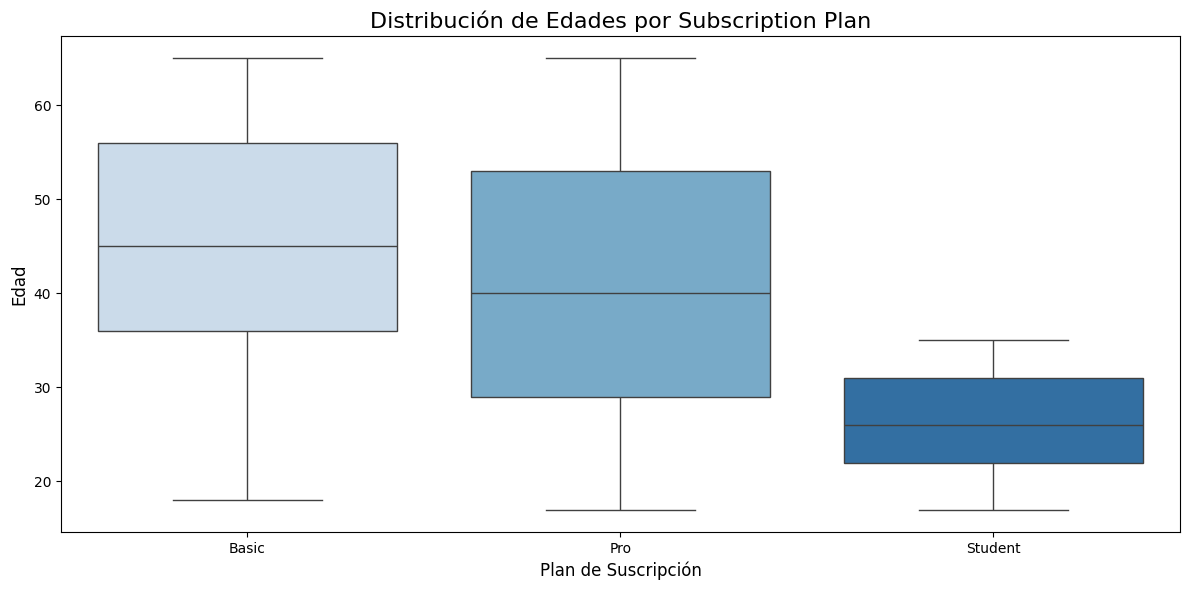

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos un boxplot de edades por plan
plt.figure(figsize=(12, 6))
sns.boxplot(x='subscription_plan', y='age', data=df_info_copia, palette='Blues')

# Personalización
plt.title('Distribución de Edades por Subscription Plan', fontsize=16)
plt.xlabel('Plan de Suscripción', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.tight_layout()
plt.show()


La reasignación de usuarios mayores de 35 años desde el plan "Student" al plan "Basic" ha corregido los datos.

Los datos reflejan con mayor precisión el comportamiento esperado de cada plan:
* Basic como un plan genérico para personas de todas las edades.
* Pro como un plan avanzado con usuarios ligeramente más jóvenes.
* Student como un plan restringido a jóvenes.

### Variable `features`

Hemos separado la cadena de texto en la columna 'features' por coma y las convertimos en columnas especificas de cada feature.

Eliminamos la columna 'features' y nos quedamos con las columnas recien creadas. Estas columnas se mantienen relacionadas a la columna 'subscription_plan'.

Se logró realizar los cambios adecuadamente y se obtiene más información sobre los gimnasios.


In [ ]:
# Eliminamos espacios extra en los nombres de las columnas
df_info_copia.columns = df_info_copia.columns.str.strip()

# Agrupamos y contamos las filas en cada grupo
grouped_df = df_info_copia.groupby(['subscription_plan', 'features']).size().reset_index(name='count')

# Mostramos el DataFrame agrupado
print(grouped_df)

  subscription_plan                                           features  count
0             Basic  Access To Basic Facilities, Limited Class Acce...   1000
1             Basic  Access To Basic Gym Facilities, Limited Class ...   1628
2               Pro  Access To All Facilities, Unlimited Class Acce...   1687
3           Student  Access To Basic Facilities, Limited Class Acce...    685


In [ ]:
# Separamos las características por coma y las convertimos en columnas
features_split = df_info_copia['features'].str.split(',', expand=True)

# Agregamos estas columnas al DataFrame original
df_features_columns = pd.concat([df_info_copia, features_split], axis=1)

# Mostramos los primeros resultados
print(df_features_columns.head())

  user_id  age gender  birthdate sign_up_date user_location subscription_plan  \
0  User_1   23      F 2000-02-29   2023-02-06        Denver             Basic   
1  User_2   44      N 1978-12-22   2023-08-08       Orlando               Pro   
2  User_3   61      F 1962-08-30   2021-01-11       Orlando             Basic   
3  User_4   19      M 2003-12-05   2023-08-07        Denver               Pro   
4  User_5   19      F 2004-08-25   2021-01-08        Denver             Basic   

                                            features  new_age  new_price  \
0  Access To Basic Gym Facilities, Limited Class ...       23      19.99   
1  Access To All Facilities, Unlimited Class Acce...       44      49.99   
2  Access To Basic Gym Facilities, Limited Class ...       61      19.99   
3  Access To All Facilities, Unlimited Class Acce...       19      49.99   
4  Access To Basic Gym Facilities, Limited Class ...       19      19.99   

                                0                       

In [ ]:
df_info_copia = df_features_columns

In [ ]:
# Cambiamos el nombre de las columnas
df_info_copia = df_info_copia.rename(columns={
    0: 'accesso_a',
    1: 'tipo_acceso',
    2: 'beneficios_invitados',
    3: 'beneficios_adicionales'})

In [ ]:
# Agrupamos por 'subscription_plan' y 'features'
grouped_df = df_info_copia.groupby(['subscription_plan', 'features']).size().reset_index(name='count')
grouped_df

,subscription_plan,features,count
0,Basic,"Access To Basic Facilities, Limited Class Acce...",1000
1,Basic,"Access To Basic Gym Facilities, Limited Class ...",1628
2,Pro,"Access To All Facilities, Unlimited Class Acce...",1687
3,Student,"Access To Basic Facilities, Limited Class Acce...",685


In [ ]:
# Eliminamos una o más columnas por nombre
columns_to_drop = ['features']  # Reemplazamos con los nombres de las columnas que deseas eliminar
df_info_copia = df_info_copia.drop(columns=columns_to_drop)

# Mostramos el DataFrame actualizado
print(df_info_copia.head())

  user_id  age gender  birthdate sign_up_date user_location subscription_plan  \
0  User_1   23      F 2000-02-29   2023-02-06        Denver             Basic   
1  User_2   44      N 1978-12-22   2023-08-08       Orlando               Pro   
2  User_3   61      F 1962-08-30   2021-01-11       Orlando             Basic   
3  User_4   19      M 2003-12-05   2023-08-07        Denver               Pro   
4  User_5   19      F 2004-08-25   2021-01-08        Denver             Basic   

   new_age  new_price                       accesso_a  \
0       23      19.99  Access To Basic Gym Facilities   
1       44      49.99        Access To All Facilities   
2       61      19.99  Access To Basic Gym Facilities   
3       19      49.99        Access To All Facilities   
4       19      19.99  Access To Basic Gym Facilities   

               tipo_acceso       beneficios_invitados  \
0     Limited Class Access     1 Guest Pass Per Month   
1   Unlimited Class Access   5 Guest Passes Per Month   

Remplazamos para mejorar la calidad del dato:

In [ ]:
# Creamos un diccionario con los reemplazos
replacements = {
    'Access To Basic Gym Facilities': 'Basic Facility Access',
    'Access To Basic Facilities': 'Basic Facility Access',
    'Access To All Facilities': 'Full Facility Access',
    'Limited Class Access': 'Limited Class Access',
    'Unlimited Class Access': 'Unlimited Class Access',
    '1 Guest Pass Per Month': '1 Guest Pass/Month',
    '5 Guest Passes Per Month': '5 Guest Passes/Month'
}

# Aplicamos los reemplazos a las columnas relevantes
columns_to_update = ['accesso_a', 'tipo_acceso', 'beneficios_invitados']

for col in columns_to_update:
    df_info_copia[col] = df_info_copia[col].replace(replacements)


In [ ]:
# Agrupamos y contamos las filas en cada grupo
grouped_df = df_info_copia.groupby(['subscription_plan','accesso_a', 'tipo_acceso','beneficios_invitados', 'beneficios_adicionales']).size().reset_index(name='count')

# Mostramos el DataFrame agrupado
grouped_df


,subscription_plan,accesso_a,tipo_acceso,beneficios_invitados,beneficios_adicionales,count
0,Basic,Basic Facility Access,Limited Class Access,1 Guest Pass Per Month,Discounted For Students,1000
1,Pro,Full Facility Access,Unlimited Class Access,5 Guest Passes Per Month,Free Personal Trainer Session,1687
2,Student,Basic Facility Access,Limited Class Access,1 Guest Pass Per Month,Discounted For Students,685


In [ ]:
df_info= df_info_copia

## Unión de base de datos y transformaciones de variables

Al tener estas dos bases de datos, hemos decidido realizar un merge a través de **user_id**.

### Merge

In [ ]:
# Cambiamos los valores de las columnas a formato Title Case para tener los mismos formatos en todas las columnas texto
df_history['gym_id'] = df_history['gym_id'].str.title()
df_history['workout_type'] = df_history['workout_type'].str.title()
df_history['location'] = df_history['location'].str.title()
df_history['gym_type'] = df_history['gym_type'].str.title()
df_history['facilities'] = df_history['facilities'].str.title()
df_history['user_id'] = df_history['user_id'].str.title()

In [ ]:
# Aplicamos el Merge
merged_df = pd.merge(df_info, df_history, on = 'user_id' , how = "inner")
merged_df.head(3)
merged_df_copia = merged_df.copy()

In [ ]:
merged_df_copia.columns

Index(['user_id', 'age', 'gender', 'birthdate', 'sign_up_date',
       'user_location', 'subscription_plan', 'new_age', 'new_price',
       'accesso_a', 'tipo_acceso', 'beneficios_invitados',
       'beneficios_adicionales', 'gym_id', 'checkin_time', 'checkout_time',
       'workout_type', 'calories_burned', 'location', 'gym_type',
       'facilities'],
      dtype='object')

### Columna de  `gym_type`

Observamos que habian varias categorias en la columna 'gym_type'. Decidimos agruparlos en 3 categorias: Budget, Standard y Premium.

In [ ]:
# Agrupamos y contamos las filas en cada grupo
grouped_df = merged_df_copia.groupby(['gym_type']).size().reset_index(name='count')
grouped_df

,gym_type,count
0,Budget,90024
1,Economico,50
2,Muy Caro!,70
3,Normalillo,100
4,Premium,149817
5,Standard,59939


Podemos agrupar las categorías en tres grandes categorías.

In [ ]:
# Diccionario de mapeo para cambiar los valores
mapping = {
    'Budget': 'Budget',
    'Economico': 'Budget',

    'Normalillo': 'Standard',
    'Standard': 'Standard',

    'Muy Caro!': 'Premium',
    'Premium': 'Premium'
}

# Reemplazamos los valores en la columna 'gym_type'
merged_df_copia['gym_type_categorizado'] = merged_df_copia['gym_type'].replace(mapping)

Al observar que existen varias categorías, agrupamos las categorías en tres grandes grupos. Donde:
1. **Premium**: Abarca la categoría **Premium** y **Muy Caro**
2. **Standard**: Abarca la categoría  **Normalillo** y **Standard**
3. **Budget (Económico)**: Abarca la categoría **Budget!** y **Economico.**

In [ ]:
# Comprobamos que se realizó bien la agrupación:
# Agrupamos y contamos las filas en cada grupo
grouped_df = merged_df_copia.groupby(['gym_type_categorizado']).size().reset_index(name='count')
grouped_df

,gym_type_categorizado,count
0,Budget,90074
1,Premium,149887
2,Standard,60039


### Columna gym_id

Observamos que habian Nan en la columna 'gym_id' y para arreglarlos hemos identificado el location de cada gimnasio y sustituimos el NaN por el respectivo gimnasio.

In [ ]:
# Cambiamos el nombre de una columna para evitar confusiones
merged_df_copia = merged_df_copia.rename(columns={'location': 'gym_location'})

In [ ]:
# Miramos los valores únicos de la columna 'gym_id'
unique_gym_ids = merged_df_copia['gym_id'].unique()
print("Valores únicos en gym_id:")
print(unique_gym_ids)

Valores únicos en gym_id:
['Gym_8' 'Gym_9' 'Gym_4' 'Gym_6' 'Gym_7' 'Gym_3' 'Gym_2' 'Gym_1' 'Gym_5'
 'Gym_10' nan]


In [ ]:
# Miramos los valores únicos de la columna 'location'
unique_locations = merged_df_copia['gym_location'].unique()
print("\nValores únicos en location:")
print(unique_locations)


Valores únicos en location:
['San Diego' 'Dallas' 'Houston' 'Philadelphia' 'San Antonio' 'Chicago'
 'Los Angeles' 'New York' 'Phoenix' 'San Jose']


In [ ]:
print(merged_df_copia.groupby('gym_id')['gym_location'].unique())
missing_gym_ids = merged_df_copia[merged_df_copia['gym_id'].isna()]
missing_gym_ids

gym_id
Gym_1         [New York]
Gym_10        [San Jose]
Gym_2      [Los Angeles]
Gym_3          [Chicago]
Gym_4          [Houston]
Gym_5          [Phoenix]
Gym_6     [Philadelphia]
Gym_7      [San Antonio]
Gym_8        [San Diego]
Gym_9           [Dallas]
Name: gym_location, dtype: object


,user_id,age,gender,birthdate,sign_up_date,user_location,subscription_plan,new_age,new_price,accesso_a,...,beneficios_adicionales,gym_id,checkin_time,checkout_time,workout_type,calories_burned,gym_location,gym_type,facilities,gym_type_categorizado
304,User_6,54,M,1969-09-11,2022-02-13,Austin,Basic,54,9.99,Basic Facility Access,...,Discounted For Students,NaN,2023-05-09 11:37:00,2023-05-09 12:41:00,Crossfit,477.0,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",Budget
1389,User_24,39,M,1984-02-11,2022-07-11,Orlando,Basic,39,19.99,Basic Facility Access,...,None,NaN,2023-06-24 12:36:00,2023-06-24 13:28:00,Weightlifting,785.0,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",Budget
2264,User_39,62,F,1961-03-14,2022-08-15,Las Vegas,Pro,62,49.99,Full Facility Access,...,Free Personal Trainer Session,NaN,2023-01-14 10:16:00,2023-01-14 12:26:00,Crossfit,320.0,Phoenix,Standard,"Basketball Court, Crossfit, Swimming Pool",Standard
3185,User_54,62,N,1961-08-13,2023-04-06,Austin,Basic,62,9.99,Basic Facility Access,...,Discounted For Students,NaN,2023-04-06 06:17:00,2023-04-06 09:10:00,Swimming,706.0,San Jose,Premium,"Swimming Pool, Sauna, Crossfit",Premium
4210,User_71,57,M,1966-03-17,2022-04-23,Boston,Basic,57,9.99,Basic Facility Access,...,Discounted For Students,NaN,2023-04-25 06:18:00,2023-04-25 07:37:00,Cardio,1504.0,San Jose,Premium,"Swimming Pool, Sauna, Crossfit",Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293242,User_4887,30,F,1993-02-11,2023-08-06,Boston,Basic,30,19.99,Basic Facility Access,...,None,NaN,2023-08-19 06:38:00,2023-08-19 09:12:00,Pilates,1468.0,Chicago,Budget,"Sauna, Climbing Wall, Swimming Pool",Budget
293988,User_4900,42,F,1981-08-11,2021-05-21,Las Vegas,Basic,42,9.99,Basic Facility Access,...,Discounted For Students,NaN,2023-04-22 07:22:00,2023-04-22 07:55:00,Pilates,1090.0,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna",Budget
294269,User_4905,51,F,1972-02-21,2021-06-07,Seattle,Basic,51,9.99,Basic Facility Access,...,Discounted For Students,NaN,2023-04-02 12:58:00,2023-04-02 15:06:00,Pilates,695.0,San Antonio,Premium,"Sauna, Basketball Court, Swimming Pool",Premium
294561,User_4910,56,F,1967-02-23,2023-05-06,Denver,Basic,56,19.99,Basic Facility Access,...,None,NaN,2023-08-23 12:32:00,2023-08-23 13:51:00,Swimming,1377.0,San Antonio,Premium,"Sauna, Basketball Court, Swimming Pool",Premium


In [ ]:
gym_by_location = merged_df_copia.groupby('gym_location')['gym_id'].unique()
print(gym_by_location)

gym_location
Chicago          [Gym_3, nan]
Dallas           [Gym_9, nan]
Houston          [Gym_4, nan]
Los Angeles      [Gym_2, nan]
New York         [Gym_1, nan]
Philadelphia     [Gym_6, nan]
Phoenix          [Gym_5, nan]
San Antonio      [Gym_7, nan]
San Diego        [Gym_8, nan]
San Jose        [Gym_10, nan]
Name: gym_id, dtype: object


In [ ]:
location_to_gym = {
    'Chicago': 'Gym_3',
    'Dallas': 'Gym_9',
    'Houston': 'Gym_4',
    'Los Angeles': 'Gym_2',
    'New York': 'Gym_1',
    'Philadelphia': 'Gym_6',
    'Phoenix': 'Gym_5',
    'San Antonio': 'Gym_7',
    'San Diego': 'Gym_8',
    'San Jose': 'Gym_10'}

In [ ]:
# Reemplazo de Nan por el gym indicado
merged_df_copia['gym_id'] = merged_df_copia.apply(
    lambda row: location_to_gym[row['gym_location']] if pd.isna(row['gym_id']) else row['gym_id'],
    axis=1
)
print(merged_df_copia['gym_id'].isna().sum())
print(merged_df_copia['gym_id'].unique())

0
['Gym_8' 'Gym_9' 'Gym_4' 'Gym_6' 'Gym_7' 'Gym_3' 'Gym_2' 'Gym_1' 'Gym_5'
 'Gym_10']


Asimismo, se puede observar que cada Gym alberga usuarios de diferentes lugares.

In [ ]:
# Identificamos los valores unicos de gym_location
unique_locations = merged_df_copia.groupby('gym_location')['user_location'].unique()

# Convertimos a un DataFrame para visualizar mejor
unique_locations

,user_location
gym_location,
Chicago,"[Denver, Orlando, Austin, Seattle, Atlanta, De..."
Dallas,"[Denver, Orlando, Austin, Seattle, Atlanta, De..."
Houston,"[Denver, Orlando, Austin, Seattle, Atlanta, De..."
Los Angeles,"[Denver, Orlando, Austin, Seattle, Atlanta, De..."
New York,"[Denver, Orlando, Austin, Seattle, Atlanta, De..."
Philadelphia,"[Denver, Orlando, Austin, Seattle, Atlanta, De..."
Phoenix,"[Denver, Orlando, Austin, Seattle, Atlanta, De..."
San Antonio,"[Denver, Orlando, Austin, Seattle, Atlanta, De..."
San Diego,"[Denver, Orlando, Austin, Seattle, Atlanta, De..."


### Interacción entre `user_id` y `gym_location`

Hemos observado en nuestros datos que tenemos visitas de usuarios que van a diferentes gym. Observamos qué sucede y si esto tiene sentido.

In [ ]:
# Aseguramos de que 'checkin_time' sea de tipo datetime
merged_df_copia['checkin_time'] = pd.to_datetime(merged_df_copia['checkin_time'], errors='coerce')

# Eliminanos filas con valores nulos en 'checkin_time' o 'gym_location'
merged_df_copia = merged_df_copia.dropna(subset=['checkin_time', 'gym_location'])

# Extraemos la fecha del check-in
merged_df_copia['date'] = merged_df_copia['checkin_time'].dt.date

# Contamos gimnasios únicos visitados por cada usuario en cada día
gym_visits_per_day = merged_df_copia.groupby(['user_id', 'date'])['gym_location'].nunique().reset_index()

# Renombramos la columna para claridad
gym_visits_per_day.rename(columns={'gym_location': 'unique_gyms_visited'}, inplace=True)

# Filtramos usuarios que visitaron más de un gimnasio en un día
users_multiple_gyms_per_day = gym_visits_per_day[gym_visits_per_day['unique_gyms_visited'] > 1]

# Ordenamos por número de gimnasios únicos visitados, de mayor a menor
users_multiple_gyms_per_day = users_multiple_gyms_per_day.sort_values(by='unique_gyms_visited', ascending=False)

# Contamos usuarios únicos afectados
unique_users = users_multiple_gyms_per_day['user_id'].nunique()

# Imprimimos resultados
print(f"Cantidad de usuarios que visitaron más de un gimnasio en un día: {unique_users}")
print(f"Registros que visitan diferentes gimnasios en un mismo día: {len(users_multiple_gyms_per_day)}")
print(users_multiple_gyms_per_day.head())

# Mostramos resultados finales para análisis
users_multiple_gyms_per_day.reset_index(drop=True, inplace=True)


Cantidad de usuarios que visitaron más de un gimnasio en un día: 4966
Registros que visitan diferentes gimnasios en un mismo día: 24552
          user_id        date  unique_gyms_visited
133900  User_3226  2023-07-16                    5
160012  User_3658  2023-02-22                    5
259463   User_806  2023-09-05                    4
208274  User_4460  2023-09-04                    4
2714    User_1046  2023-02-23                    4


Podemos ver que el User_3658 en la fecha 2023-02-22 visitó a 5 gimnasios diferentes. Esto claramente no tiene sentido. Por lo tanto, identificaremos por usuario a qué gym asiste en su mayoría utilizando la moda, para luego reemplazar los otros registros por el valor encontrado. Ya que problamente haya un error de tipeo.

In [ ]:
# Contamos visitas de cada usuario a cada gimnasio
gym_visits = merged_df_copia.groupby(['user_id', 'gym_location', 'gym_id', 'facilities', 'gym_type_categorizado']).size().reset_index(name='visit_count')


# Identificamos el gimnasio con más visitas para cada usuario
most_visited_gym = gym_visits.loc[gym_visits.groupby('user_id')['visit_count'].idxmax()]

# Renombramos columnas para claridad
most_visited_gym = most_visited_gym.rename(columns={'gym_location': 'most_visited_gym', 'visit_count': 'most_visits'})

most_visited_gym_sorted = most_visited_gym.sort_values(by='most_visits', ascending=False)

# Vemos los resultados ordenados
most_visited_gym_sorted.head()


,user_id,most_visited_gym,gym_id,facilities,gym_type_categorizado,most_visits
3206,User_1288,San Antonio,Gym_7,"Sauna, Basketball Court, Swimming Pool",Premium,18
37654,User_4397,Los Angeles,Gym_2,"Climbing Wall, Yoga Classes, Sauna",Budget,18
29382,User_3650,Philadelphia,Gym_6,"Swimming Pool, Climbing Wall, Sauna",Budget,18
14105,User_2271,Houston,Gym_4,"Climbing Wall, Basketball Court, Swimming Pool",Premium,18
35652,User_4215,Phoenix,Gym_5,"Basketball Court, Crossfit, Swimming Pool",Standard,17


Se puede observar que un usuario User_4397 en todo el año 2023 visito al gym solamente 18 veces. Eso claramente no tiene sentido por lo que confirma que deberíamos reemplazar los demas registros por la moda.

In [ ]:
# Contamos visitas de cada usuario a cada gimnasio
gym_visits = merged_df_copia.groupby(['user_id', 'gym_location', 'gym_id', 'facilities', 'gym_type_categorizado']).size().reset_index(name='visit_count')

# Identificaremos el gimnasio con más visitas para cada usuario
most_visited_gym = gym_visits.loc[gym_visits.groupby('user_id')['visit_count'].idxmax()]

# Renombramos columnas para claridad
most_visited_gym = most_visited_gym.rename(columns={
    'gym_location': 'most_visited_gym',
    'gym_id': 'most_visited_gym_id',
    'facilities': 'most_visited_facilities',
    'gym_type_categorizado': 'most_visited_gym_type_categorizado',
    'visit_count': 'most_visits'
})

# Diagnóstico: Verificamos columnas en most_visited_gym
print("Columnas de most_visited_gym:", most_visited_gym.columns)

# Mapeamos los datos del gimnasio más visitado a cada usuario en el DataFrame original
merged_df_copia = merged_df_copia.merge(
    most_visited_gym[['user_id', 'most_visited_gym', 'most_visited_gym_id', 'most_visited_facilities', 'most_visited_gym_type_categorizado']],
    on='user_id',
    how='left'
)

# Diagnóstico: Verificaremos columnas resultantes después del merge
print("Columnas de merged_df_copia:", merged_df_copia.columns)


Columnas de most_visited_gym: Index(['user_id', 'most_visited_gym', 'most_visited_gym_id',
       'most_visited_facilities', 'most_visited_gym_type_categorizado',
       'most_visits'],
      dtype='object')
Columnas de merged_df_copia: Index(['user_id', 'age', 'gender', 'birthdate', 'sign_up_date',
       'user_location', 'subscription_plan', 'new_age', 'new_price',
       'accesso_a', 'tipo_acceso', 'beneficios_invitados',
       'beneficios_adicionales', 'gym_id', 'checkin_time', 'checkout_time',
       'workout_type', 'calories_burned', 'gym_location', 'gym_type',
       'facilities', 'gym_type_categorizado', 'date', 'most_visited_gym',
       'most_visited_gym_id', 'most_visited_facilities',
       'most_visited_gym_type_categorizado'],
      dtype='object')


In [ ]:
# Ordenamos por usuario y tiempo de check-in
merged_df_copia = merged_df_copia.sort_values(by=['user_id', 'checkin_time'])
merged_df_copia

,user_id,age,gender,birthdate,sign_up_date,user_location,subscription_plan,new_age,new_price,accesso_a,...,calories_burned,gym_location,gym_type,facilities,gym_type_categorizado,date,most_visited_gym,most_visited_gym_id,most_visited_facilities,most_visited_gym_type_categorizado
36,User_1,23,F,2000-02-29,2023-02-06,Denver,Basic,23,19.99,Basic Facility Access,...,1519.0,San Diego,Standard,"Basketball Court, Sauna, Crossfit",Standard,2023-01-02,Houston,Gym_4,"Climbing Wall, Basketball Court, Swimming Pool",Premium
37,User_1,23,F,2000-02-29,2023-02-06,Denver,Basic,23,19.99,Basic Facility Access,...,1362.0,Dallas,Premium,"Sauna, Crossfit, Yoga Classes",Premium,2023-01-02,Houston,Gym_4,"Climbing Wall, Basketball Court, Swimming Pool",Premium
46,User_1,23,F,2000-02-29,2023-02-06,Denver,Basic,23,19.99,Basic Facility Access,...,444.0,Phoenix,Standard,"Basketball Court, Crossfit, Swimming Pool",Standard,2023-01-07,Houston,Gym_4,"Climbing Wall, Basketball Court, Swimming Pool",Premium
42,User_1,23,F,2000-02-29,2023-02-06,Denver,Basic,23,19.99,Basic Facility Access,...,491.0,Dallas,Premium,"Sauna, Crossfit, Yoga Classes",Premium,2023-01-08,Houston,Gym_4,"Climbing Wall, Basketball Court, Swimming Pool",Premium
60,User_1,23,F,2000-02-29,2023-02-06,Denver,Basic,23,19.99,Basic Facility Access,...,975.0,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",Premium,2023-01-09,Houston,Gym_4,"Climbing Wall, Basketball Court, Swimming Pool",Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60064,User_999,47,M,1975-12-04,2021-05-21,Austin,Basic,47,9.99,Basic Facility Access,...,1351.0,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",Premium,2023-09-16,Philadelphia,Gym_6,"Swimming Pool, Climbing Wall, Sauna",Budget
60066,User_999,47,M,1975-12-04,2021-05-21,Austin,Basic,47,9.99,Basic Facility Access,...,1114.0,San Antonio,Premium,"Sauna, Basketball Court, Swimming Pool",Premium,2023-09-17,Philadelphia,Gym_6,"Swimming Pool, Climbing Wall, Sauna",Budget
60065,User_999,47,M,1975-12-04,2021-05-21,Austin,Basic,47,9.99,Basic Facility Access,...,1079.0,Dallas,Premium,"Sauna, Crossfit, Yoga Classes",Premium,2023-09-18,Philadelphia,Gym_6,"Swimming Pool, Climbing Wall, Sauna",Budget
60047,User_999,47,M,1975-12-04,2021-05-21,Austin,Basic,47,9.99,Basic Facility Access,...,813.0,Chicago,Budget,"Sauna, Climbing Wall, Swimming Pool",Budget,2023-10-05,Philadelphia,Gym_6,"Swimming Pool, Climbing Wall, Sauna",Budget


In [ ]:
# Eliminamos las columnas anteriores que identificamos errores
merged_df_copia = merged_df_copia.drop(columns=['gym_location',	'gym_type',	'facilities', 'gym_type_categorizado','gym_id'])

In [ ]:
merged_df_copia = merged_df_copia.rename(columns={
    'most_visited_gym': 'gym_location',
    'most_visited_gym_id': 'gym_id',
    'most_visited_facilities': 'facilities',
    'most_visited_gym_type_categorizado': 'gym_type_categorizado'})


In [ ]:
merged_df_copia.head()

,user_id,age,gender,birthdate,sign_up_date,user_location,subscription_plan,new_age,new_price,accesso_a,...,beneficios_adicionales,checkin_time,checkout_time,workout_type,calories_burned,date,gym_location,gym_id,facilities,gym_type_categorizado
36,User_1,23,F,2000-02-29,2023-02-06,Denver,Basic,23,19.99,Basic Facility Access,...,None,2023-01-02 14:49:00,2023-01-02 15:50:00,Yoga,1519.0,2023-01-02,Houston,Gym_4,"Climbing Wall, Basketball Court, Swimming Pool",Premium
37,User_1,23,F,2000-02-29,2023-02-06,Denver,Basic,23,19.99,Basic Facility Access,...,None,2023-01-02 17:55:00,2023-01-02 19:47:00,Crossfit,1362.0,2023-01-02,Houston,Gym_4,"Climbing Wall, Basketball Court, Swimming Pool",Premium
46,User_1,23,F,2000-02-29,2023-02-06,Denver,Basic,23,19.99,Basic Facility Access,...,None,2023-01-07 17:05:00,2023-01-07 18:33:00,Pilates,444.0,2023-01-07,Houston,Gym_4,"Climbing Wall, Basketball Court, Swimming Pool",Premium
42,User_1,23,F,2000-02-29,2023-02-06,Denver,Basic,23,19.99,Basic Facility Access,...,None,2023-01-08 17:23:00,2023-01-08 20:16:00,Weightlifting,491.0,2023-01-08,Houston,Gym_4,"Climbing Wall, Basketball Court, Swimming Pool",Premium
60,User_1,23,F,2000-02-29,2023-02-06,Denver,Basic,23,19.99,Basic Facility Access,...,None,2023-01-09 10:31:00,2023-01-09 12:25:00,Crossfit,975.0,2023-01-09,Houston,Gym_4,"Climbing Wall, Basketball Court, Swimming Pool",Premium


### Columna calories_burned






<Axes: >

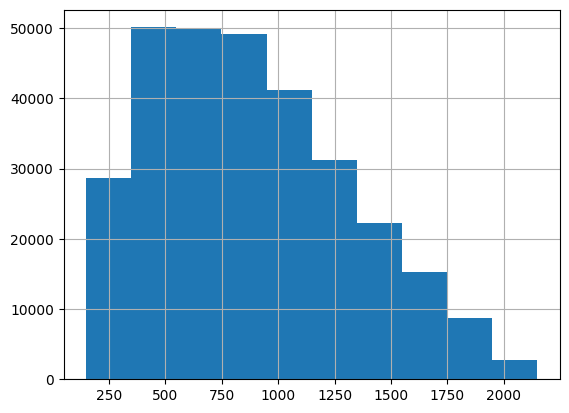

In [ ]:
merged_df_copia['calories_burned'].hist()

In [ ]:
# Filtremos por filas con valores NaN
nan_calories_df = merged_df_copia[merged_df_copia['calories_burned'].isna()]

# Agrupamos por 'workout_type' y contamos las ocurrencias
nan_counts_by_workout_type = nan_calories_df.groupby('workout_type').size()

# Imprimimos los resultados
print(nan_counts_by_workout_type)

workout_type
Cardio           79
Crossfit         75
Pilates          89
Swimming         85
Weightlifting    94
Yoga             78
dtype: int64


In [ ]:
# Identificamos la mediana por deporte
merged_df_copia['calories_burned'].groupby(merged_df_copia['workout_type']).median()

,calories_burned
workout_type,
Cardio,834.0
Crossfit,836.0
Pilates,833.0
Swimming,835.0
Weightlifting,833.0
Yoga,834.0


In [ ]:
# Identificamos la mediana por genero
merged_df_copia.groupby('gender')['calories_burned'].median()

,calories_burned
gender,
F,832.0
M,834.0
N,845.0


In [ ]:
# Identificamos la mediana por workout_type y genero
merged_df_copia.groupby(['workout_type', 'gender'])['calories_burned'].median()

workout_type   gender
Cardio         F         834.0
               M         833.0
               N         836.0
Crossfit       F         832.0
               M         835.0
               N         860.0
Pilates        F         834.0
               M         827.0
               N         853.0
Swimming       F         830.0
               M         839.0
               N         842.0
Weightlifting  F         828.0
               M         836.0
               N         840.0
Yoga           F         834.0
               M         833.0
               N         835.0
Name: calories_burned, dtype: float64

Debido que la quema de calorías, varía según el deporte y el género. Hemos decidido tomarlo en cuenta porque rellenar los valores faltantes usando la mediana por grupo (workout_type y gender) es una solución razonable ya que es estadísticamente sólida. Además, respeta las relaciones inherentes en los datos y permite mantener la mayor cantidad de información posible sin introducir sesgos.

In [ ]:
# Calculamos la mediana de 'calories_burned' para cada combinación de 'workout_type' y 'gender'
median_calories = merged_df_copia.groupby(['workout_type', 'gender'])['calories_burned'].transform('median')

# Creamos una nueva columna donde los valores faltantes se rellenan con las medianas correspondientes
merged_df_copia['calories_burned_new'] = merged_df_copia['calories_burned'].fillna(median_calories)


In [ ]:
# Confirmamos el relleno de los valores Nan
diff_rows = merged_df_copia[merged_df_copia['calories_burned'] != merged_df_copia['calories_burned_new']]
print(diff_rows[['calories_burned', 'calories_burned_new']])

       calories_burned  calories_burned_new
60360              NaN                833.0
63601              NaN                833.0
65721              NaN                833.0
65696              NaN                836.0
65798              NaN                834.0
...                ...                  ...
57584              NaN                835.0
58117              NaN                840.0
58577              NaN                833.0
58775              NaN                853.0
58863              NaN                827.0

[500 rows x 2 columns]


In [ ]:
merged_df_copia.drop(columns=['calories_burned'], inplace=True)

In [ ]:
# Confirmamos que no hay valores nulos
merged_df_copia.isnull().sum()

,0
user_id,0
age,0
gender,0
birthdate,0
sign_up_date,0
user_location,0
subscription_plan,0
new_age,0
new_price,0
accesso_a,0


### Columna facilities

In [ ]:
#Agrupamos y contamos las filas en cada grupo

grouped_df = merged_df_copia.groupby(['accesso_a', 'tipo_acceso','facilities']).size().reset_index(name='count')

# Mostramos el DataFrame agrupado
grouped_df

,accesso_a,tipo_acceso,facilities,count
0,Basic Facility Access,Limited Class Access,"Basketball Court, Crossfit, Swimming Pool",19012
1,Basic Facility Access,Limited Class Access,"Basketball Court, Sauna, Crossfit",15978
2,Basic Facility Access,Limited Class Access,"Climbing Wall, Basketball Court, Swimming Pool",23815
3,Basic Facility Access,Limited Class Access,"Climbing Wall, Swimming Pool, Basketball Court",19017
4,Basic Facility Access,Limited Class Access,"Climbing Wall, Yoga Classes, Sauna",20227
5,Basic Facility Access,Limited Class Access,"Sauna, Basketball Court, Swimming Pool",16671
6,Basic Facility Access,Limited Class Access,"Sauna, Climbing Wall, Swimming Pool",27575
7,Basic Facility Access,Limited Class Access,"Sauna, Crossfit, Yoga Classes",24125
8,Basic Facility Access,Limited Class Access,"Swimming Pool, Climbing Wall, Sauna",19004
9,Basic Facility Access,Limited Class Access,"Swimming Pool, Sauna, Crossfit",13453


In [ ]:
# Ordenar las instalaciones por orden alfabético dentro de cada fila
merged_df_copia['facilities'] = merged_df_copia['facilities'].apply(lambda x: ', '.join(sorted(x.split(', '))))

#Agrupar y contar las filas en cada grupo
grouped_df = merged_df_copia.groupby(['accesso_a', 'tipo_acceso','facilities']).size().reset_index(name='count')

# Mostrar el DataFrame agrupado
grouped_df

,accesso_a,tipo_acceso,facilities,count
0,Basic Facility Access,Limited Class Access,"Basketball Court, Climbing Wall, Swimming Pool",42832
1,Basic Facility Access,Limited Class Access,"Basketball Court, Crossfit, Sauna",15978
2,Basic Facility Access,Limited Class Access,"Basketball Court, Crossfit, Swimming Pool",19012
3,Basic Facility Access,Limited Class Access,"Basketball Court, Sauna, Swimming Pool",16671
4,Basic Facility Access,Limited Class Access,"Climbing Wall, Sauna, Swimming Pool",46579
5,Basic Facility Access,Limited Class Access,"Climbing Wall, Sauna, Yoga Classes",20227
6,Basic Facility Access,Limited Class Access,"Crossfit, Sauna, Swimming Pool",13453
7,Basic Facility Access,Limited Class Access,"Crossfit, Sauna, Yoga Classes",24125
8,Full Facility Access,Unlimited Class Access,"Basketball Court, Climbing Wall, Swimming Pool",21392
9,Full Facility Access,Unlimited Class Access,"Basketball Court, Crossfit, Sauna",7729


Se ha observado que existen registros o usuarios que hacen deportes en gimnasios que no ofrecen esos deportes. Por ejemplo: se observa que hay casos en que un usuario realiza swimming pero el gimnasio no posee una piscina. De igual manera, existen casos que el usuario realiza yoga pero el gimasio no ofrece clases de yoga. Es por eso que se ha decidido eliminar estos registros que  no contienen coherencia.

In [ ]:
#Agrupamos y contar las filas en cada grupo
grouped_df = merged_df_copia.groupby([ 'workout_type','facilities']).size().reset_index(name='count')

# Mostramos el DataFrame agrupado
grouped_df

,workout_type,facilities,count
0,Cardio,"Basketball Court, Climbing Wall, Swimming Pool",10495
1,Cardio,"Basketball Court, Crossfit, Sauna",3833
2,Cardio,"Basketball Court, Crossfit, Swimming Pool",4884
3,Cardio,"Basketball Court, Sauna, Swimming Pool",4077
4,Cardio,"Climbing Wall, Sauna, Swimming Pool",11636
5,Cardio,"Climbing Wall, Sauna, Yoga Classes",5209
6,Cardio,"Crossfit, Sauna, Swimming Pool",3374
7,Cardio,"Crossfit, Sauna, Yoga Classes",6121
8,Crossfit,"Basketball Court, Climbing Wall, Swimming Pool",10735
9,Crossfit,"Basketball Court, Crossfit, Sauna",3992


De igual manera se encuentra el deporte de pilates y gimasios donde no ofrecen ese tipo de clases. Para esto, se podría tener en cuenta que Pilates debido a que es una disciplina que requiere un lugar más tranquilo posee un ambiente similar al de Yoga por lo que podríamos tomar en cuenta para este deporte solo los gyms que poseen ese tipo de instalaciones.
Ademas, hemos eliminados usuarios que hacen Crossfit y van a un gym que no tiene esa instalación.

In [ ]:
# Actualizamos la columna 'Swimming_match'
merged_df_copia['Swimming_match'] = merged_df_copia.apply(
    lambda row: (
        'sí' if ('Swimming Pool' in str(row['facilities'])) and ('Swimming' in str(row['workout_type']))
        else 'no' if ('Swimming Pool' not in str(row['facilities'])) and ('Swimming' in str(row['workout_type']))
        else row['workout_type']
    ), axis=1
)

# Actualizamos la columna 'Yoga_match', incluyendo Pilates si hay Yoga Classes en facilities
merged_df_copia['Yoga_match'] = merged_df_copia.apply(
    lambda row: (
        'sí' if ('Yoga' in str(row['facilities']) and row['workout_type'] in ['Yoga', 'Pilates'])
        else 'no' if row['workout_type'] in ['Yoga', 'Pilates']
        else row['workout_type']
    ), axis=1
)


# Actualizamos la columna 'Crossfit_match'
merged_df_copia['Crossfit_match'] = merged_df_copia.apply(
    lambda row: (
        'sí' if ('Crossfit' in str(row['facilities'])) and ('Crossfit' in str(row['workout_type']))
        else 'no' if ('Crossfit' not in str(row['facilities'])) and ('Crossfit' in str(row['workout_type']))
        else row['workout_type']
    ), axis=1
)

In [ ]:
# Eliminamos las filas con 'no' en cualquiera de las columnas (Swimming_match, Yoga_match, Crossfit_match)
merged_df_copia = merged_df_copia[
    (merged_df_copia['Swimming_match'] != 'no') &
    (merged_df_copia['Yoga_match'] != 'no') &
    (merged_df_copia['Crossfit_match'] != 'no')
]

# Verificar el resultado
print(f"Registros restantes después de eliminar: {merged_df_copia.shape[0]}")


Registros restantes después de eliminar: 175753


In [ ]:
grouped_df = merged_df_copia.groupby([ 'workout_type','facilities']).size().reset_index(name='count')

grouped_df

,workout_type,facilities,count
0,Cardio,"Basketball Court, Climbing Wall, Swimming Pool",10495
1,Cardio,"Basketball Court, Crossfit, Sauna",3833
2,Cardio,"Basketball Court, Crossfit, Swimming Pool",4884
3,Cardio,"Basketball Court, Sauna, Swimming Pool",4077
4,Cardio,"Climbing Wall, Sauna, Swimming Pool",11636
5,Cardio,"Climbing Wall, Sauna, Yoga Classes",5209
6,Cardio,"Crossfit, Sauna, Swimming Pool",3374
7,Cardio,"Crossfit, Sauna, Yoga Classes",6121
8,Crossfit,"Basketball Court, Crossfit, Sauna",3992
9,Crossfit,"Basketball Court, Crossfit, Swimming Pool",4841


In [ ]:
# Eliminamos las columnas 'Swimming_match', 'Yoga_match' y 'Crossfit_match'
merged_df_copia = merged_df_copia.drop(['Swimming_match', 'Yoga_match', 'Crossfit_match'], axis=1)

# Verificamos el resultado
print("Columnas restantes después de eliminar:")
print(merged_df_copia.columns)

Columnas restantes después de eliminar:
Index(['user_id', 'age', 'gender', 'birthdate', 'sign_up_date',
       'user_location', 'subscription_plan', 'new_age', 'new_price',
       'accesso_a', 'tipo_acceso', 'beneficios_invitados',
       'beneficios_adicionales', 'checkin_time', 'checkout_time',
       'workout_type', 'date', 'gym_location', 'gym_id', 'facilities',
       'gym_type_categorizado', 'calories_burned_new'],
      dtype='object')


### Columnas que tienen valores de fecha: `sign_up_date`,`checkin_time` y `checkout_time`


In [ ]:
merged_df_copia['sign_up_date'] = pd.to_datetime(merged_df_copia['sign_up_date'])
merged_df_copia['checkin_time'] = pd.to_datetime(merged_df_copia['checkin_time'])
merged_df_copia['checkout_time'] = pd.to_datetime(merged_df_copia['checkout_time'])

En la data se ha observado que hay registros que tienen usuarios que registran visitas al gimnasio antes de la fecha de su inscripción al gimnasio. Por lo tanto, hemos eliminado porque es una incoherencia. De esa manera, nos aseguramos que solo se incluyan check-ins posteriores a la fecha de inscripción.

In [ ]:
registros_equivocados = merged_df_copia[merged_df_copia['checkin_time'] < merged_df_copia['sign_up_date']]

# Contamos el número de usuarios que cumplen con la condición
usuarios_equivocados = len(registros_equivocados)

print(f"La cantidad de registros equivocados que presentan visitas antes de su inscricpión al gym son: {usuarios_equivocados}")

La cantidad de registros equivocados que presentan visitas antes de su inscricpión al gym son: 25201


De igual manera, revisamos si existen incoherencias en `checkin_time` y `checkout_time`.

In [ ]:
# Filtramos las filas que cumplen la condición incorrecta
usuarios_condicion = merged_df_copia[merged_df_copia['checkin_time'] >= merged_df_copia['checkout_time']]

# Contamos el número de usuarios que cumplen con la condición
cantidad_usuarios = len(usuarios_condicion)

print(f"La cantidad de usuarios que cumplen con la condición incorrecta es: {cantidad_usuarios}")

La cantidad de usuarios que cumplen con la condición incorrecta es: 0


Nos quedamos con todos los datos que sí tienen sentido.

In [ ]:
merged_df_copia = merged_df_copia[merged_df_copia['checkin_time'] >= merged_df_copia['sign_up_date']]

Observamos las fechas de los datos:

In [ ]:
# Extraemos solo el mes de la columna 'checkin_time' y crear una nueva columna
merged_df_copia['checkin_month'] = merged_df_copia['checkin_time'].dt.month

# Verificamos los datos
print(merged_df_copia[['checkin_time', 'checkin_month']].head())

          checkin_time  checkin_month
25 2023-02-07 07:28:00              2
57 2023-02-22 14:33:00              2
55 2023-03-14 10:28:00              3
47 2023-03-18 19:22:00              3
0  2023-03-19 08:22:00              3


<ipython-input-303-fb17c18f8137>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_copia['checkin_month'] = merged_df_copia['checkin_time'].dt.month


In [ ]:
# Extraemos solo el año de la columna 'checkin_time' y creamos una nueva columna

#Checkin:
merged_df_copia['checkin_year'] = merged_df_copia['checkin_time'].dt.year
anos_unicos_checkin = merged_df_copia['checkin_year'].unique()
# Sign up
merged_df_copia['sign_year'] = merged_df_copia['sign_up_date'].dt.year
anos_unicos_signup= merged_df_copia['sign_year'].unique()
1
print("Años únicos en la variable checkin_time :", sorted(anos_unicos_checkin))
print("Años únicos en la variable sign_up_date :", sorted(anos_unicos_signup))


Años únicos en la variable checkin_time : [2023]
Años únicos en la variable sign_up_date : [2021, 2022, 2023]


<ipython-input-304-d48b981b739a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_copia['checkin_year'] = merged_df_copia['checkin_time'].dt.year
<ipython-input-304-d48b981b739a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_copia['sign_year'] = merged_df_copia['sign_up_date'].dt.year


In [ ]:
# Extraemos solo el año de la columna 'checkin_time' y creamos una nueva columna

#Checkin:
merged_df_copia['checkin_month'] = merged_df_copia['checkin_time'].dt.month
meses_unicos_checkin = merged_df_copia['checkin_month'].unique()
# Sign up
merged_df_copia['sign_month'] = merged_df_copia['sign_up_date'].dt.month
meses_unicos_signup= merged_df_copia['sign_month'].unique()

print("Meses únicos en la variable checkin_time :", sorted(meses_unicos_checkin))
print("Meses únicos en la variable sign_up_date :", sorted(meses_unicos_signup))

Meses únicos en la variable checkin_time : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Meses únicos en la variable sign_up_date : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Observamos que tenemos fechas de incripción desde 2021 pero solo tenemos registros de las visitas desde 2023.

Por tanto, nos damos cuenta que tenemos registros de visitas solo del año 2023 y de los meses de enero hasta octubre por lo que probablemente estos datos fueron extraídos en noviembre 2023 y por eso no tenemos los meses de noviembre y diciembre.

In [ ]:
# Contamos la cantidad de datos por año en la columna 'sign_year'
count_per_year = merged_df_copia['sign_year'].value_counts().reset_index()

# Renombramos las columnas para mayor claridad
count_per_year.columns = ['sign_year', 'count']

# Mostramos los resultados
print(count_per_year)

   sign_year  count
0       2021  62843
1       2022  62028
2       2023  25681


In [ ]:
# Contamos usuarios únicos en todo el DataFrame
total_unique_users = merged_df_copia['user_id'].nunique()

# Mostramos el resultado
total_unique_users

4962

Verificamos si existe en el mismo minuto del checkin, usuarios que hacen checkin más de 1 vez.

In [ ]:
# Agrupamos por usuario y contamos check-ins en el mismo minuto
checkin_in_same_minute = (
    merged_df_copia.groupby(['user_id', merged_df_copia['checkin_time'].dt.floor('T')])
    .size()
    .reset_index(name='count')
    .query('count > 1')
    .sort_values(by='count', ascending=False)  # Ordenamos por la columna 'count' de mayor a menor
)

# Mostramos el resultado ordenado
checkin_in_same_minute

<ipython-input-308-7da2f20a66fb>:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  merged_df_copia.groupby(['user_id', merged_df_copia['checkin_time'].dt.floor('T')])


,user_id,checkin_time,count
21488,User_1639,2023-05-25 08:15:00,2
32560,User_1968,2023-08-31 10:44:00,2
41284,User_2224,2023-05-16 07:49:00,2
63381,User_2882,2023-01-02 16:16:00,2
76595,User_3279,2023-06-20 11:36:00,2
99732,User_3968,2023-09-20 12:48:00,2
121188,User_4612,2023-05-02 16:41:00,2
122688,User_4659,2023-04-17 06:59:00,2


In [ ]:
# Identificamos duplicados exactos basados en usuario y tiempo de check-in
duplicated_checkins = merged_df_copia[merged_df_copia.duplicated(subset=['user_id', 'checkin_time'], keep='first')]

# Eliminamos duplicados dejando solo la primera ocurrencia
merged_df_copia = merged_df_copia.drop_duplicates(subset=['user_id', 'checkin_time'], keep='first')

# Verificamos que los duplicados hayan sido eliminados
remaining_duplicates = merged_df_copia[merged_df_copia.duplicated(subset=['user_id', 'checkin_time'], keep=False)]

# Mostramos los duplicados restantes (debería ser vacío si se eliminaron correctamente)
remaining_duplicates.shape[0], merged_df_copia.shape


(0, (150544, 26))

In [ ]:
merged_df_copia = merged_df_copia.drop_duplicates(subset=['user_id', 'checkin_time'])

# III. Exploración de variables numéricas y categóricas

En este apartado, exploraremos las variables del dataset.

In [ ]:
merged_df_copia.columns

Index(['user_id', 'age', 'gender', 'birthdate', 'sign_up_date',
       'user_location', 'subscription_plan', 'new_age', 'new_price',
       'accesso_a', 'tipo_acceso', 'beneficios_invitados',
       'beneficios_adicionales', 'checkin_time', 'checkout_time',
       'workout_type', 'date', 'gym_location', 'gym_id', 'facilities',
       'gym_type_categorizado', 'calories_burned_new', 'checkin_month',
       'checkin_year', 'sign_year', 'sign_month'],
      dtype='object')

**Mapa gym_location**

---


In [ ]:
gym_locations = merged_df_copia['gym_location'].unique().tolist()
print(gym_locations)

['Houston', 'Philadelphia', 'Phoenix', 'San Jose', 'New York', 'Chicago', 'Dallas', 'Los Angeles', 'San Antonio', 'San Diego']


In [ ]:
# INSTALL FOLIUM PACKAGE
!pip install folium

In [ ]:
# MAPA INTERACTIVO
import folium
from folium.plugins import HeatMap

# CENTERED MAP
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # CENTRAL U.S COORDINATES


# COORDINATES
city_coords = {
    'Philadelphia': [39.9526, -75.1652],  # PENNSYLVANIA
    'Los Angeles': [34.0522, -118.2437],  # CALIFORNIA
    'San Antonio': [29.4241, -98.4936], # TEXAS
    'San Jose': [37.3382, -121.8863], # CALIFORNIA
    'Phoenix': [33.4484, -112.0740], # ARIZONA
    'San Diego': [32.7157, -117.1611], # CALIFORNIA
    'New York': [40.7128, -74.0060], # NEW YORK STATE
    'Chicago': [41.8781, -87.6298], # ILLINOIS
    'Houston': [29.7604, -95.3698], # TEXAS
    'Dallas': [32.7767, -96.7970] # TEXAS
}

# LATITUDE & LONGITUDE
heat_data = list(city_coords.values())

# LAYER
HeatMap(heat_data).add_to(m)

# DISPLAY
m

**Duración de cada sesión de entreno**

---


Hemos creado la columna 'workout_duration' que representa la duración de cada sesión de entrenamiento. Esta información se deriva de la diferencia entre el `checkin_time`y el `checkout_time`.

In [ ]:
# Creamos la nueva columna a partir de las fechas de entrada y salida de cada sesión
merged_df_copia['workout_duration'] = merged_df_copia['checkout_time'] - merged_df_copia['checkin_time']

print(merged_df_copia[['checkin_time','checkout_time', 'workout_duration']])

             checkin_time       checkout_time workout_duration
25    2023-02-07 07:28:00 2023-02-07 09:01:00  0 days 01:33:00
57    2023-02-22 14:33:00 2023-02-22 16:32:00  0 days 01:59:00
55    2023-03-14 10:28:00 2023-03-14 12:36:00  0 days 02:08:00
47    2023-03-18 19:22:00 2023-03-18 21:33:00  0 days 02:11:00
0     2023-03-19 08:22:00 2023-03-19 10:36:00  0 days 02:14:00
...                   ...                 ...              ...
60054 2023-09-01 15:05:00 2023-09-01 17:25:00  0 days 02:20:00
60050 2023-09-07 06:25:00 2023-09-07 07:16:00  0 days 00:51:00
60064 2023-09-16 18:05:00 2023-09-16 19:55:00  0 days 01:50:00
60066 2023-09-17 10:37:00 2023-09-17 12:14:00  0 days 01:37:00
60080 2023-10-13 11:41:00 2023-10-13 14:12:00  0 days 02:31:00

[150544 rows x 3 columns]


In [ ]:
merged_df_copia['workout_duration'] = pd.to_timedelta(merged_df_copia['workout_duration'])

merged_df_copia['workout_duration'].describe()

,workout_duration
count,150544
mean,0 days 01:44:30.756058029
std,0 days 00:43:12.946851496
min,0 days 00:30:00
25%,0 days 01:07:00
50%,0 days 01:44:00
75%,0 days 02:22:00
max,0 days 02:59:00


Debido a que 'workout_duration' tiene el siguiente formato: 0 dias 01:33:00. Cambiamos para obtener solo en horas la duración de entrenamiento.

In [ ]:
# Aseguramos de que workout_duration esté en formato Timedelta
merged_df_copia['workout_duration'] = pd.to_timedelta(merged_df_copia['workout_duration'], errors='coerce')

# Calculamos estadísticas básicas
mean_duration = merged_df_copia['workout_duration'].mean()
std_duration = merged_df_copia['workout_duration'].std()

# Convertimos resultados a cadena y extraemos solo la parte de tiempo
mean_time = str(mean_duration).split(" ")[-1]
std_time = str(std_duration).split(" ")[-1]

# Mostramos resultados
print(f"Duración promedio: {mean_time}")
print(f"Desviación estándar: {std_time}")


Duración promedio: 01:44:30.756058029
Desviación estándar: 00:43:12.946851496


In [ ]:
merged_df_copia.groupby('workout_type')['workout_duration'].mean()

,workout_duration
workout_type,
Cardio,0 days 01:44:34.651780467
Crossfit,0 days 01:44:07.774874115
Pilates,0 days 01:44:50.502559816
Swimming,0 days 01:44:38.539621260
Weightlifting,0 days 01:44:22.314935064
Yoga,0 days 01:44:44.956122022


In [ ]:
# Observamos las columnas numéricas
numerical_columns = merged_df_copia.select_dtypes(include=['float64', 'int64']).columns
print("Variables numéricas:", numerical_columns)

# Observamos las columnas categóricas
categorical_columns = merged_df_copia.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas:", categorical_columns)


Variables numéricas: Index(['age', 'new_age', 'new_price', 'calories_burned_new'], dtype='object')
Variables categóricas: Index(['user_id', 'gender', 'user_location', 'subscription_plan', 'accesso_a',
       'tipo_acceso', 'beneficios_invitados', 'beneficios_adicionales',
       'workout_type', 'date', 'gym_location', 'gym_id', 'facilities',
       'gym_type_categorizado'],
      dtype='object')


In [ ]:
# Tiempo promedio por persona en cada gimnasio:
# Calculamos el tiempo promedio de entrenamiento por gimnasio
avg_duration_per_gym = merged_df_copia.groupby('gym_id')['workout_duration'].mean()
print("\nTiempo promedio de entrenamiento por gimnasio:")
print(avg_duration_per_gym)


Tiempo promedio de entrenamiento por gimnasio:
gym_id
Gym_1    0 days 01:45:08.413319492
Gym_10   0 days 01:45:18.454825462
Gym_2    0 days 01:44:57.843236837
Gym_3    0 days 01:44:40.879120879
Gym_4    0 days 01:44:33.582745306
Gym_5    0 days 01:43:39.568643716
Gym_6    0 days 01:43:24.656210258
Gym_7    0 days 01:44:04.508832601
Gym_8    0 days 01:44:34.742880144
Gym_9    0 days 01:44:36.466528640
Name: workout_duration, dtype: timedelta64[ns]


# IV. Relaciones y Correlaciones entre Variables


## 1. Análisis Demográfico de los Usuarios

### Distribución por género.

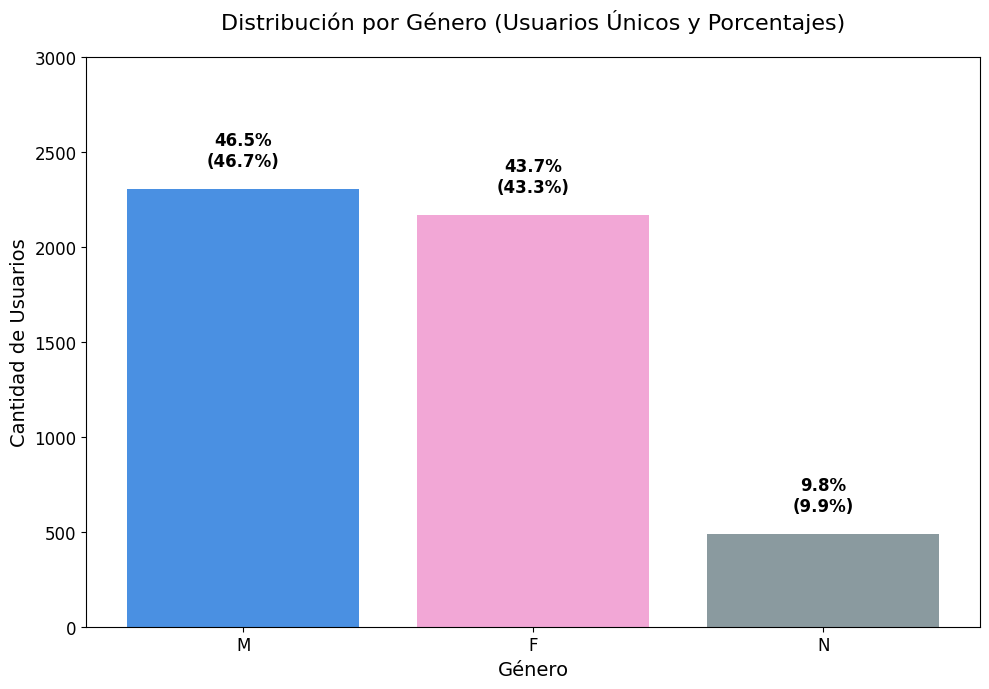

In [ ]:
# Filtramos usuarios únicos
unique_users = merged_df_copia.drop_duplicates(subset='user_id')

# Calculamos frecuencias y porcentajes
total_counts = merged_df_copia['gender'].value_counts()
total_percentages = (total_counts / len(merged_df_copia) * 100).round(2)

unique_counts = unique_users['gender'].value_counts()
unique_percentages = (unique_counts / len(unique_users) * 100).round(2)

# Creamos un DataFrame combinado
summary_df = pd.DataFrame({
    'Total': total_counts,
    'Total %': total_percentages,
    'Únicos': unique_counts,
    'Únicos %': unique_percentages
}).sort_values(by='Únicos', ascending=False)

# Colores más sobrios
gender_colors = {
    'M': '#4A90E2',   # Azul sutil para Masculino
    'F': '#F2A7D6',   # Rosa suave para Femenino
    'N': '#8A9A9F'    # Plomo suave para No binario
}

# Configuramos gráfico vertical
plt.figure(figsize=(10, 7))
bars = plt.bar(summary_df.index, summary_df['Únicos'],
               color=[gender_colors.get(g, '#B0BEC5') for g in summary_df.index])

# Añadimos anotaciones con porcentajes y mejorar la visibilidad
for bar, gender in zip(bars, summary_df.index):
    height = bar.get_height()
    unique_pct = summary_df.loc[gender, 'Únicos %']
    total_pct = summary_df.loc[gender, 'Total %']

    # Aumentamos el espacio entre la barra y el texto
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100,  # Aumentado a 100 para más espacio
             f'{unique_pct:.1f}%\n({total_pct:.1f}%)',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Configuramos títulos y etiquetas
plt.title('Distribución por Género (Usuarios Únicos y Porcentajes)', fontsize=16, pad=20)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Cantidad de Usuarios', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustamos el límite del eje Y hasta 4000
plt.ylim(0, 3000)

# Ajustamos margen para anotaciones y espaciado general
plt.tight_layout()
plt.show()


Podemos observar que en su mayoría, los hombres van más al gym que las mujeres o el género no binario.

### Ubicación geográfica

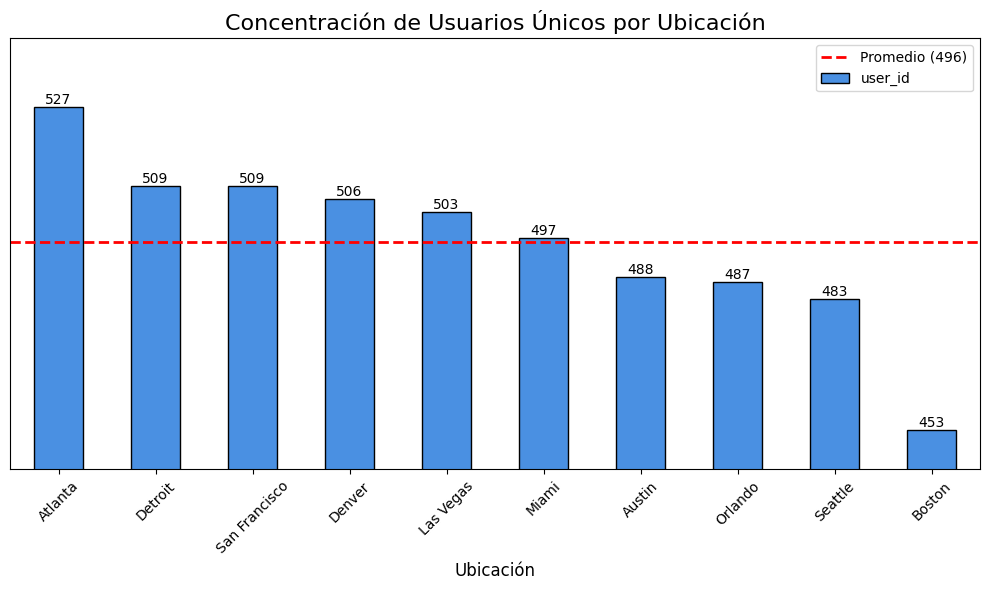

In [ ]:
# Calculamos la cantidad de usuarios únicos por ubicación
user_location_unique_counts = merged_df_copia.groupby('user_location')['user_id'].nunique()

# Ordenamos de mayor a menor
user_location_unique_counts = user_location_unique_counts.sort_values(ascending=False)

# Calculamos el promedio de usuarios únicos
average_users = user_location_unique_counts.mean()

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = user_location_unique_counts.plot(kind='bar', ax=ax, color='#4A90E2', edgecolor='black')  # Usar azul #4A90E2

# Agregamos la línea del promedio
ax.axhline(average_users, color='red', linestyle='--', linewidth=2, label=f'Promedio ({int(average_users)})')

# Etiqueta de las barras con valores
for bar in bars.patches:
    ax.annotate(f'{int(bar.get_height())}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Ajustamos título, etiquetas y rango del eje Y
plt.title('Concentración de Usuarios Únicos por Ubicación', fontsize=16)
plt.xlabel('Ubicación', fontsize=12)
plt.ylabel('Usuarios Únicos', fontsize=12)
ax.set_ylim(user_location_unique_counts.min() * 0.98, user_location_unique_counts.max() * 1.03)

# Agregamos leyenda para el promedio
plt.legend(loc='upper right')

# Rotamos etiquetas del eje X y ajustar diseño
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ocultamos el eje Y
ax.yaxis.set_visible(False)

# Ajustamos el diseño
plt.tight_layout()

# Mostramos el gráfico
plt.show()


Hemos identificado el promedio de usuarios por gym_location y observamos que en los primeros 6 gimnasios hay mas usuarios inscritos que en los demas.

### 3. Grupo etario

Hemos separado por grupos etarios y observamos que hay mas gente inscripta entre 18-30 años.

In [ ]:
# Observamos el mínimo y máximo por edad
min_age = merged_df_copia['age'].min()
max_age = merged_df_copia['age'].max()

# Mostramos el resultado
print(f'Mínimo de edad: {min_age}')
print(f'Máximo de edad: {max_age}')


Mínimo de edad: 17
Máximo de edad: 65


age_group
18-30    1433
31-40    1074
41-50     982
51-60     990
60+       483
Name: user_id, dtype: int64


<ipython-input-324-452d665798d8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = merged_df_copia.groupby('age_group')['user_id'].nunique()


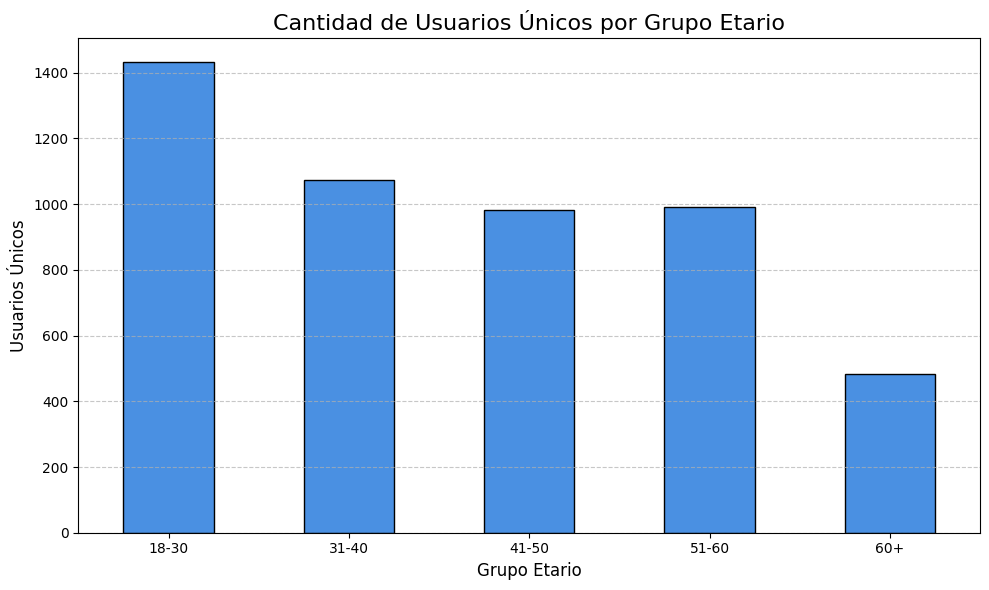

In [ ]:
# Definimos los grupos etarios más equilibrados
merged_df_copia['age_group'] = pd.cut(merged_df_copia['age'],
                                      bins=[0, 30, 40, 50, 60, 100],  # Asegurarse de que los bins sean correctos
                                      labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Contamos usuarios únicos por grupo etario
age_group_counts = merged_df_copia.groupby('age_group')['user_id'].nunique()

# Ordenamos por edad (de menor a mayor)
age_group_counts = age_group_counts.reindex(['18-30', '31-40', '41-50', '51-60', '60+'])

# Observamos la cantidad de usuarios únicos por grupo etario
print(age_group_counts)

# Creamos gráfico de barras con el color azul #4A90E2
plt.figure(figsize=(10, 6))
bars = age_group_counts.plot(kind='bar', color='#4A90E2', edgecolor='black')  # Usar azul #4A90E2

# Ajustamos título, etiquetas y otras configuraciones del gráfico
plt.title('Cantidad de Usuarios Únicos por Grupo Etario', fontsize=16)
plt.xlabel('Grupo Etario', fontsize=12)
plt.ylabel('Usuarios Únicos', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostramos el gráfico
plt.show()


<ipython-input-325-abf1114fc109>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = merged_df_copia.groupby('age_group')['user_id'].nunique()


age_group
18-30    1433
31-40    1074
41-50     982
51-60     990
60+       483
Name: user_id, dtype: int64


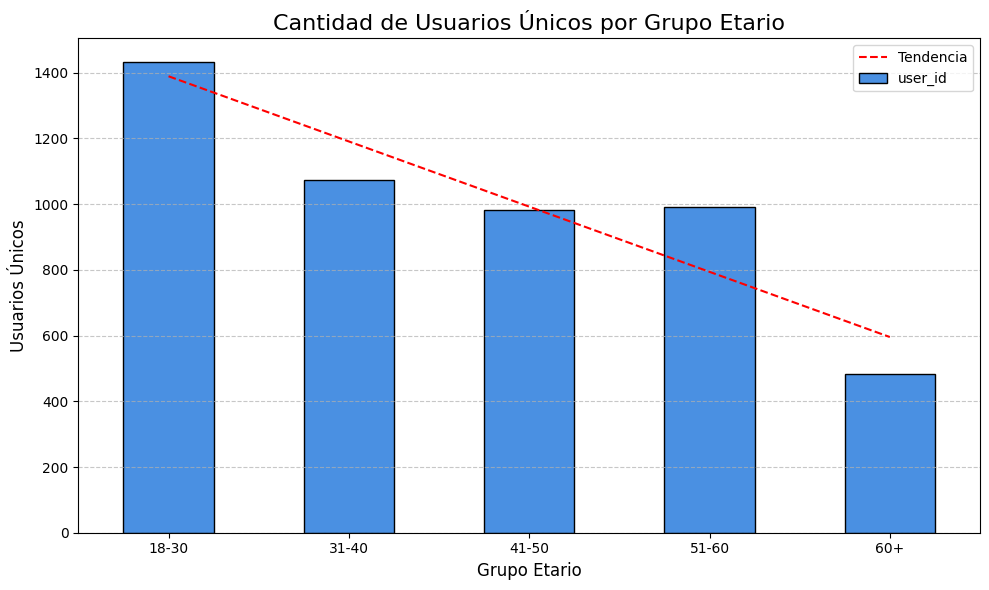

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los grupos etarios más equilibrados
merged_df_copia['age_group'] = pd.cut(merged_df_copia['age'],
                                      bins=[0, 30, 40, 50, 60, 100],
                                      labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Contamos usuarios únicos por grupo etario
age_group_counts = merged_df_copia.groupby('age_group')['user_id'].nunique()

# Ordenamos por edad (de menor a mayor)
age_group_counts = age_group_counts.reindex(['18-30', '31-40', '41-50', '51-60', '60+'])

# Observamos la cantidad de usuarios únicos por grupo etario
print(age_group_counts)

# Creamos gráfico de barras con el color azul #4A90E2
plt.figure(figsize=(10, 6))
bars = age_group_counts.plot(kind='bar', color='#4A90E2', edgecolor='black')  # Usar azul #4A90E2

# Añadimos la línea de tendencia
x = np.arange(len(age_group_counts))  # Posiciones de las barras
y = age_group_counts.values  # Cantidad de usuarios por grupo etario

# Ajustamos la línea de tendencia (polinomio de grado 1)
z = np.polyfit(x, y, 1)  # Ajuste lineal
p = np.poly1d(z)  # Polinomio

# Dibujamos la línea de tendencia
plt.plot(x, p(x), color='red', linestyle='--', label='Tendencia')  # Línea roja de tendencia

# Ajustamos título, etiquetas y otras configuraciones del gráfico
plt.title('Cantidad de Usuarios Únicos por Grupo Etario', fontsize=16)
plt.xlabel('Grupo Etario', fontsize=12)
plt.ylabel('Usuarios Únicos', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()


Se puede observar que a medida que avanza la edad, las personas se inscriben menos al gimnasio.

<ipython-input-326-fc2e3be249bd>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sports_by_age_group = merged_df_copia.groupby(['workout_type', 'age_group']).size().reset_index(name='user_count')
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is depr

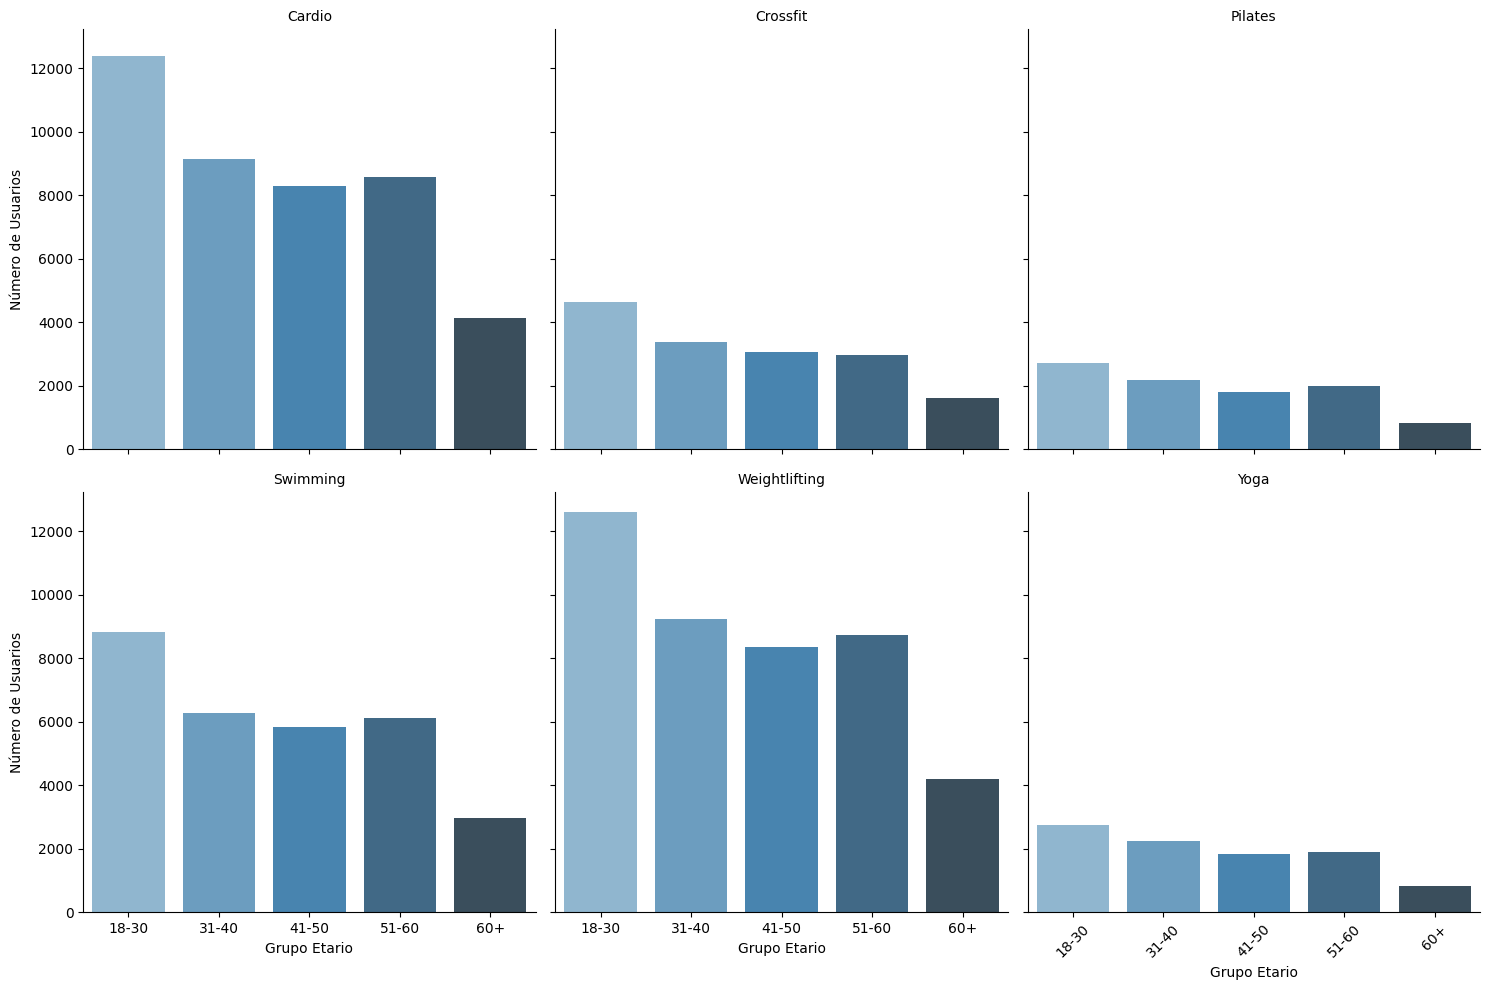

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definimos los grupos etarios
merged_df_copia['age_group'] = pd.cut(merged_df_copia['age'],
                                      bins=[0, 30, 40, 50, 60, 100],
                                      labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Agrupamos por deporte y grupo etario
sports_by_age_group = merged_df_copia.groupby(['workout_type', 'age_group']).size().reset_index(name='user_count')

# Creamos una figura para los gráficos
g = sns.FacetGrid(sports_by_age_group, col="workout_type", col_wrap=3, height=5)

# Creamos gráficos de barras por cada deporte
g.map(sns.barplot, 'age_group', 'user_count', palette='Blues_d')

# Ajustamos título, etiquetas y otras configuraciones
g.set_axis_labels("Grupo Etario", "Número de Usuarios")
g.set_titles(col_template="{col_name}", fontsize=14)
plt.xticks(rotation=45)

# Mejoramos la visualización
plt.tight_layout()
plt.show()


La gente de menos edad prefiere hacer deporte mas activos como Cardio y Weightlifting que Yoga.

## 2. ANÁLISIS DE SUSCRIPCIONES

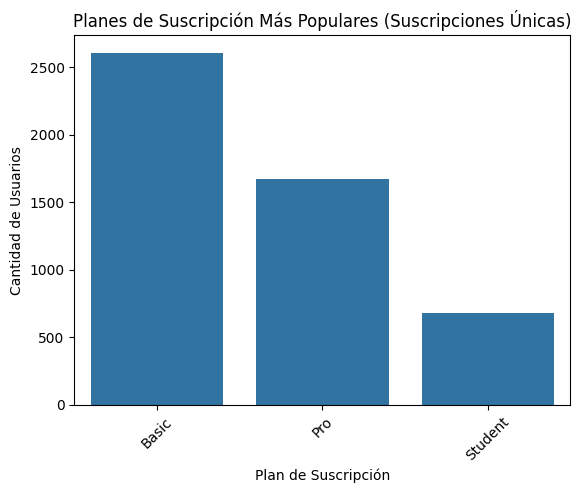

In [ ]:
# Filtrar las suscripciones únicas basadas en el 'user_id'
unique_subscriptions = merged_df_copia.drop_duplicates(subset=['user_id'])

# Graficar los planes populares
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=unique_subscriptions,
              x='subscription_plan',
              order=unique_subscriptions['subscription_plan'].value_counts().index)

plt.title('Planes de Suscripción Más Populares (Suscripciones Únicas)')
plt.xlabel('Plan de Suscripción')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)
plt.show()


Se observa que la gente tiene una tendencia a inscribirse a planes mas basico que a Pro.

##3. PATRONES DE USO DEL GIMNASIO

### Visitas al gym en general

In [ ]:
# Aseguramos de que 'checkin_time' esté en formato de fecha y agrega una columna para el día
merged_df_copia['checkin_date'] = pd.to_datetime(merged_df_copia['checkin_time']).dt.date

# Agrupamos por 'gym_id' y 'checkin_date', y calcula visitas únicas por día
visits_per_day_gym = (
    merged_df_copia.groupby(['gym_location', 'checkin_date'])['user_id']
    .nunique()
    .reset_index(name='unique_visits')
)

# Sumamos todas las visitas únicas por gimnasio
total_visits_per_gym = (
    visits_per_day_gym.groupby('gym_location')['unique_visits']
    .sum()
    .reset_index(name='total_unique_visits')
)

print("\nTotal de visitas únicas por gimnasio:")
print(total_visits_per_gym)



Total de visitas únicas por gimnasio:
   gym_location  total_unique_visits
0       Chicago                17286
1        Dallas                23883
2       Houston                14283
3   Los Angeles                16540
4      New York                11905
5  Philadelphia                11203
6       Phoenix                15780
7   San Antonio                10158
8     San Diego                 9439
9      San Jose                10922


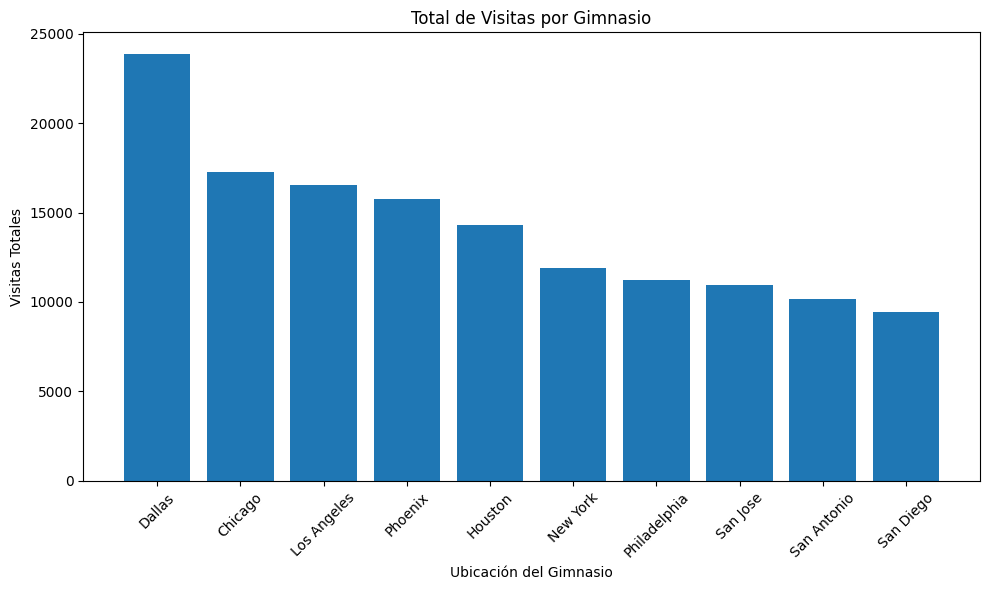

In [ ]:
# Total de visitas por gimnasio
total_visits_per_gym = (
    visits_per_day_gym.groupby('gym_location')['unique_visits']
    .sum()
    .reset_index(name='total_unique_visits')
)

# Ordenamos por total de visitas  de mayor a menor
total_visits_per_gym = total_visits_per_gym.sort_values(by='total_unique_visits', ascending=False)

# Gráfico del total de visitas  por gimnasio
plt.figure(figsize=(10, 6))
plt.bar(total_visits_per_gym['gym_location'], total_visits_per_gym['total_unique_visits'])
plt.title('Total de Visitas por Gimnasio')
plt.xlabel('Ubicación del Gimnasio')
plt.ylabel('Visitas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Agrupamos por día y sumar visitas únicas
visits_per_day = (
    visits_per_day_gym.groupby('checkin_date')['unique_visits']
    .sum()
    .reset_index()
)



Podemos observar que el gimnasio que mas se visita es el de Dallas.

### Número de Check-ins por Día de la Semana

<ipython-input-330-ae6aee87b232>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_count_per_day.index, y=user_count_per_day.values, palette='Blues_d')


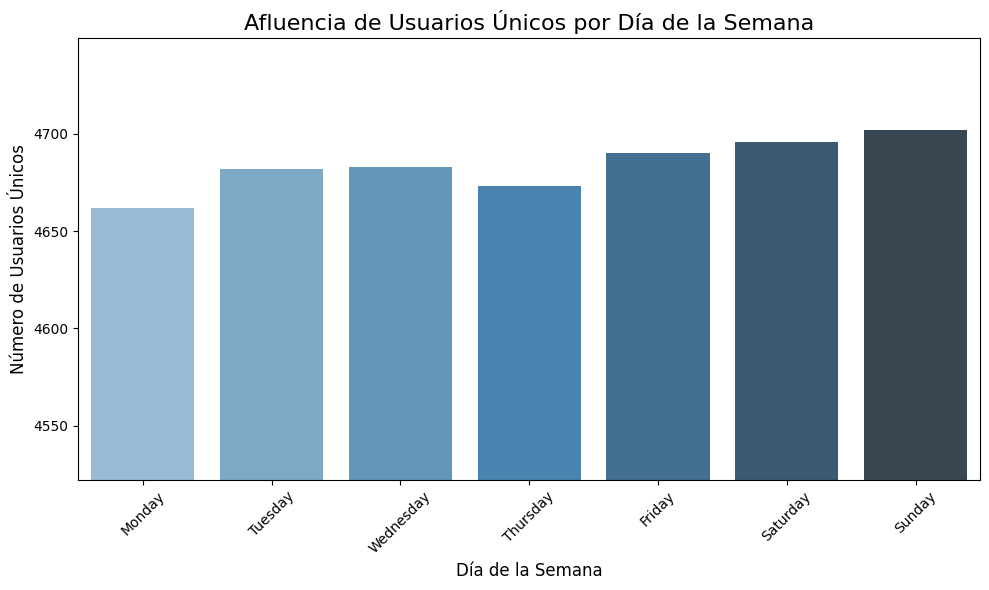

In [ ]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Creamos una nueva columna 'day_of_week' con el día de la semana
merged_df_copia['day_of_week'] = merged_df_copia['checkin_time'].dt.day_name()

# Contamos la cantidad de usuarios únicos (afluencia) por día de la semana
user_count_per_day = merged_df_copia.groupby('day_of_week')['user_id'].nunique()

# Ordenamos los días de la semana en su orden natural
user_count_per_day = user_count_per_day.reindex(days_order)

# Graficar el análisis
plt.figure(figsize=(10, 6))
sns.barplot(x=user_count_per_day.index, y=user_count_per_day.values, palette='Blues_d')

# Ajustamos el gráfico
plt.title('Afluencia de Usuarios Únicos por Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Número de Usuarios Únicos', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X

# Ajustamos el rango del eje Y para que no empiece en 0
plt.ylim(min(user_count_per_day.values) * 0.97, max(user_count_per_day.values) * 1.01)

plt.tight_layout()  # Ajustar el diseño para evitar superposición de texto

# Mostramos el gráfico
plt.show()

Podemos observar que los Domingos es el dia de la semana donde mas personas visitan el gimnasio. Mientras que el Lunes es el dia donde menos van.

### Panorama general de visitas por gym

  gym_id day_of_week  checkins
0  Gym_1      Monday      1693
1  Gym_1     Tuesday      1819
2  Gym_1   Wednesday      1787
3  Gym_1    Thursday      1793
4  Gym_1      Friday      1769


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1200x800 with 0 Axes>

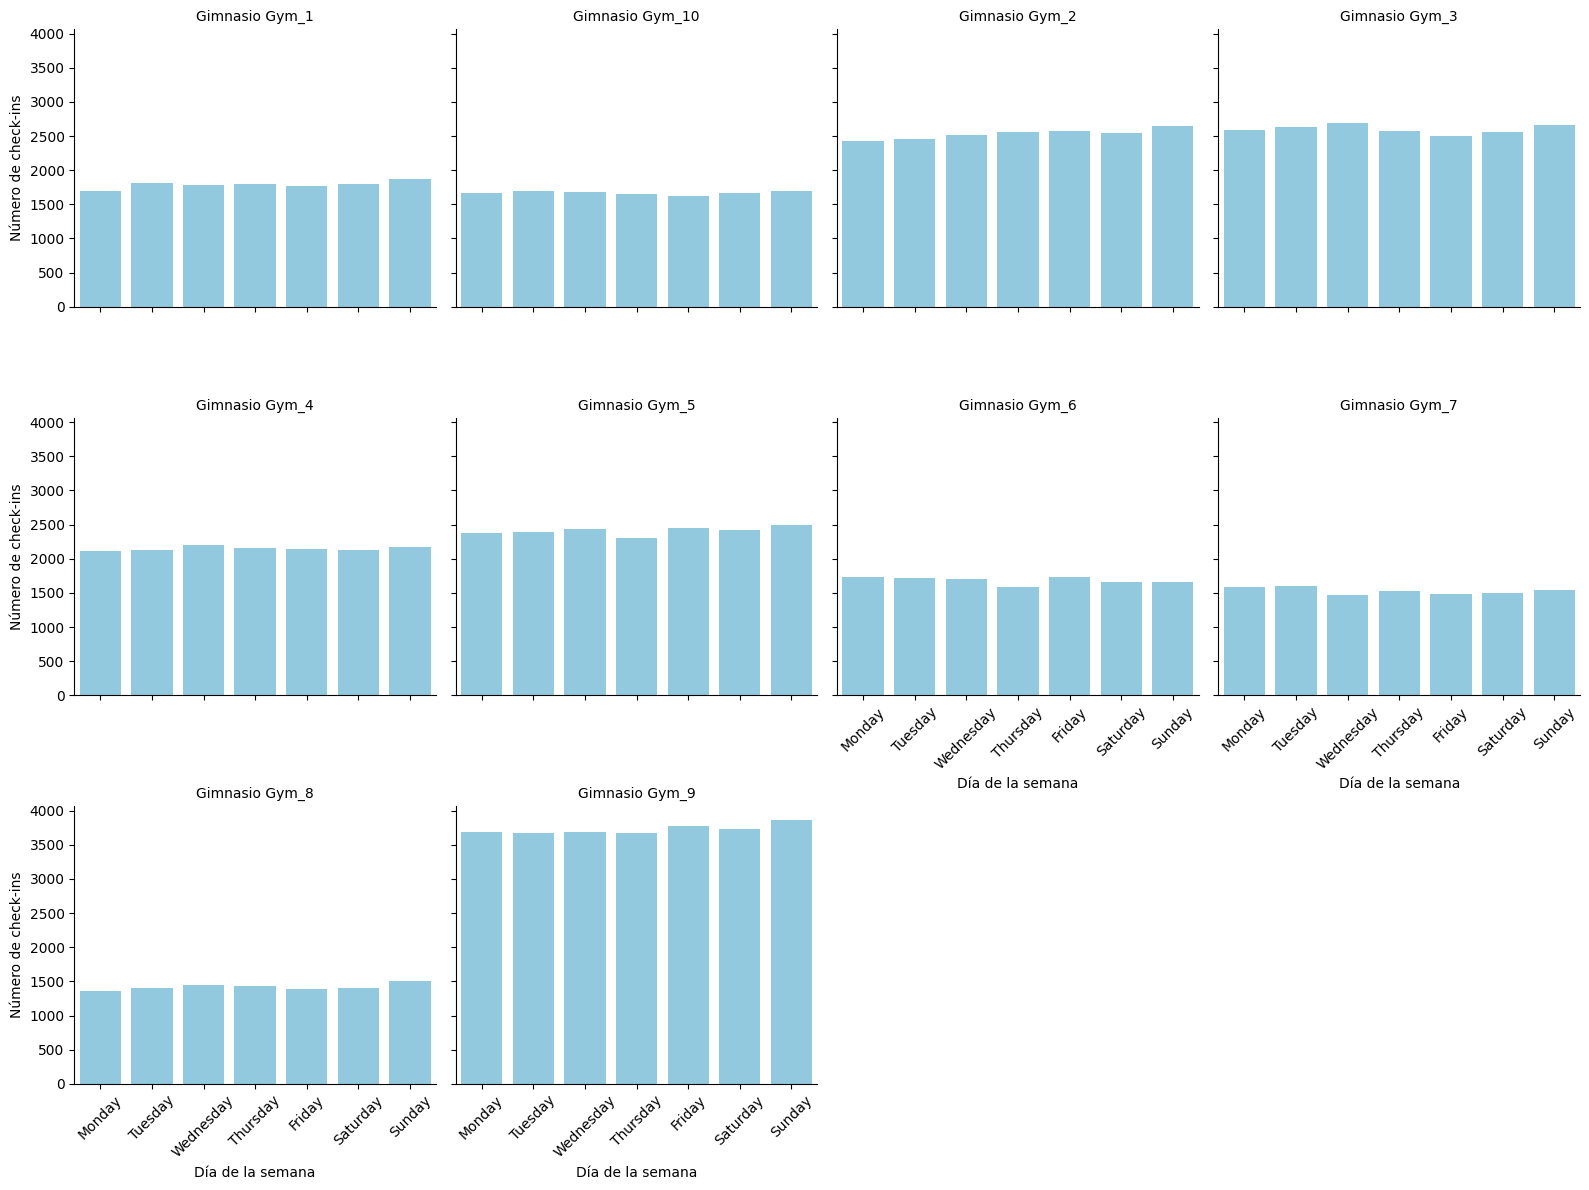

In [ ]:
# Agrupamos por gym_id y day_of_week y contar los check-ins
checkins_per_day_gym = merged_df_copia.groupby(['gym_id', 'day_of_week']).size().reset_index(name='checkins')

# Ordenamos los días de la semana en su orden natural
checkins_per_day_gym['day_of_week'] = pd.Categorical(checkins_per_day_gym['day_of_week'], categories=days_order, ordered=True)

# Creamos un DataFrame con todas las combinaciones posibles de gimnasio y día de la semana
all_combinations = pd.MultiIndex.from_product([checkins_per_day_gym['gym_id'].unique(), days_order],
                                              names=['gym_id', 'day_of_week'])

# Realizamos un merge con todas las combinaciones, rellenando con 0 donde no haya datos
checkins_per_day_gym_full = checkins_per_day_gym.set_index(['gym_id', 'day_of_week']).reindex(all_combinations, fill_value=0).reset_index()

# Verificamos que todos los días estén representados
print(checkins_per_day_gym_full.head())

# Graficar el análisis
plt.figure(figsize=(12, 8))

# Creamos un gráfico de barras para cada gimnasio
g = sns.FacetGrid(checkins_per_day_gym_full, col="gym_id", col_wrap=4, height=4)
g.map(sns.barplot, 'day_of_week', 'checkins', color='skyblue')

# Ajustamos títulos y etiquetas
g.set_axis_labels('Día de la semana', 'Número de check-ins')
g.set_titles(col_template="Gimnasio {col_name}")

# Rotamos las etiquetas del eje X para mejorar la visibilidad
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)  # Rotar las etiquetas del eje X
    ax.figure.tight_layout()  # Ajustar el diseño para evitar superposición de texto

# Mostramos el gráfico
plt.show()


Observamos que el Gym 9 es el gimnasio mas lleno durante toda la semana.

### Afluencia de gente segun horario

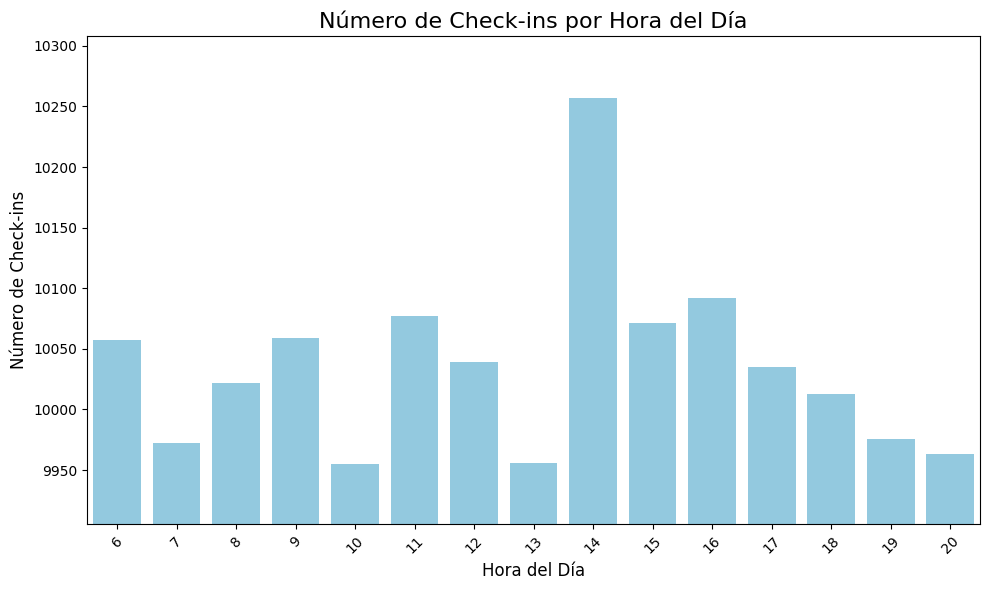

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aseguramos de que 'checkin_time' sea de tipo datetime
merged_df_copia['checkin_time'] = pd.to_datetime(merged_df_copia['checkin_time'])

# Extraemos la hora de la columna 'checkin_time' y crear una nueva columna 'hour'
merged_df_copia['hour'] = merged_df_copia['checkin_time'].dt.hour

# Contamos la cantidad de check-ins por hora
checkins_per_hour = merged_df_copia.groupby('hour').size().reset_index(name='checkins')

# Ordenamos de menor a mayor para ver las horas de forma secuencial
checkins_per_hour = checkins_per_hour.sort_values(by='hour')

# Graficar el análisis
plt.figure(figsize=(10, 6))

# Creamos el gráfico de barras para las horas de mayor actividad
sns.barplot(x='hour', y='checkins', data=checkins_per_hour, color='skyblue')

# Ajustamos títulos y etiquetas
plt.title('Número de Check-ins por Hora del Día', fontsize=16)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Número de Check-ins', fontsize=12)

# Ajustamos el límite del eje Y para que no empiece desde cero
plt.ylim(checkins_per_hour['checkins'].min() * 0.995, checkins_per_hour['checkins'].max() * 1.005)

# Rotamos las etiquetas del eje X para mejorar la visibilidad
plt.xticks(rotation=45)

# Ajustamos el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


Observamos que a las 2pm es el horario que hay mas personas visitando.

### Afluencia de usuarios con respecto al turno


Cantidad de check-ins por turno del día (ordenado por turno):
                         turno  checkins
0    Turno Dia (06:00 - 12:00)     60142
1  Turno Tarde (12:00 - 06:00)     90402


<ipython-input-333-426509ce7565>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='turno', y='checkins', data=checkins_per_shift,


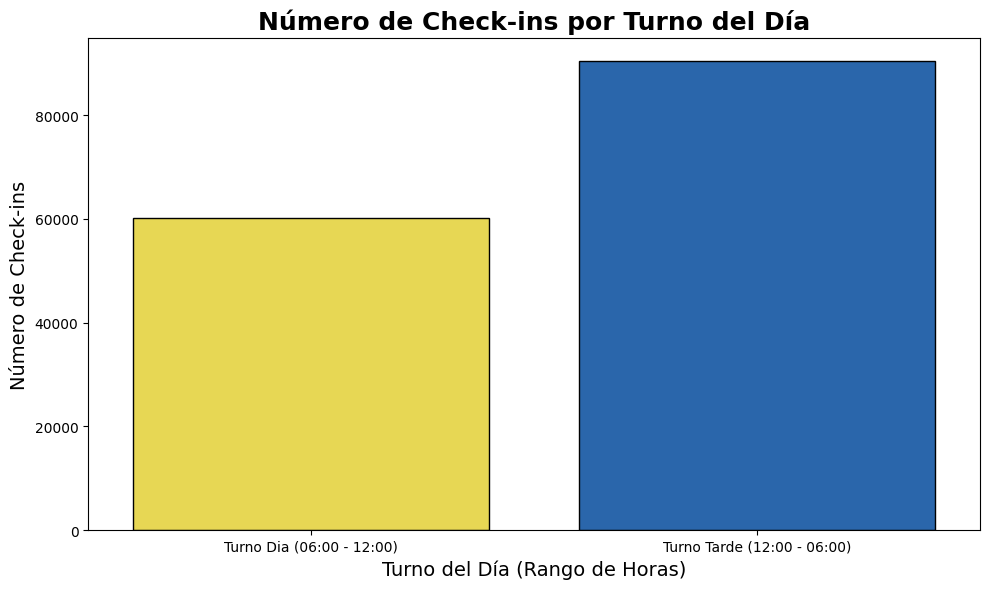

In [ ]:
# Extraemos la hora de la columna 'checkin_time' y crear una nueva columna 'hour'
merged_df_copia['hour'] = merged_df_copia['checkin_time'].dt.hour

# Asignamos los turnos según la hora
def assign_shift(hour):
    if 6 <= hour < 12:
        return 'Turno Dia (06:00 - 12:00)'  # Turno 1: de 06:00 a 12:00
    else:
        return 'Turno Tarde (12:00 - 06:00)'  # Turno 2: de 12:00 a 06:00

merged_df_copia['turno'] = merged_df_copia['hour'].apply(assign_shift)

# Contamos la cantidad de check-ins por turno
checkins_per_shift = merged_df_copia.groupby('turno').size().reset_index(name='checkins')

# Ordenamos los turnos de forma explícita: "Turno 1 (Día)" y "Turno 2 (Noche)"
turn_order = ['Turno Dia (06:00 - 12:00)', 'Turno Tarde (12:00 - 06:00)']
checkins_per_shift['turno'] = pd.Categorical(checkins_per_shift['turno'], categories=turn_order, ordered=True)

# Ordenamos por el orden de los turnos
checkins_per_shift = checkins_per_shift.sort_values('turno')

# Mostramos los resultados por turno
print("\nCantidad de check-ins por turno del día (ordenado por turno):")
print(checkins_per_shift)

# Graficar el análisis
plt.figure(figsize=(10, 6))

# Creamos el gráfico de barras para los turnos con colores personalizados
sns.barplot(x='turno', y='checkins', data=checkins_per_shift,
            palette={'Turno Dia (06:00 - 12:00)': '#FFEB3B', 'Turno Tarde (12:00 - 06:00)': '#1565C0'},
            edgecolor='black')

# Ajustamos títulos y etiquetas
plt.title('Número de Check-ins por Turno del Día', fontsize=18, weight='bold')
plt.xlabel('Turno del Día (Rango de Horas)', fontsize=14)
plt.ylabel('Número de Check-ins', fontsize=14)

# Eliminamos la cuadrícula
plt.grid(False)

# Mejoramos la visibilidad y evitar superposiciones
plt.tight_layout()

# Mostramos el gráfico
plt.show()


Observamos que mas personas visitan el gimnasio por la tarde (12:00pm - 6:00pm).

### Actividades realizadas en cada gimnasio:

In [ ]:
#1. Actividades realizadas en cada gimnasio:

# Vemos las actividades más comunes en cada gimnasio
activities_per_gym = merged_df_copia.groupby('gym_id')['workout_type'].value_counts().unstack().fillna(0)
print("Actividades por gimnasio:")
print(activities_per_gym)

Actividades por gimnasio:
workout_type  Cardio  Crossfit  Pilates  Swimming  Weightlifting    Yoga
gym_id                                                                  
Gym_1         4055.0       0.0      0.0    4246.0         4222.0     0.0
Gym_10        2888.0    2954.0      0.0    2935.0         2911.0     0.0
Gym_2         4464.0       0.0   4306.0       0.0         4564.0  4387.0
Gym_3         6122.0       0.0      0.0    6084.0         5994.0     0.0
Gym_4         4949.0       0.0      0.0    5031.0         5042.0     0.0
Gym_5         4211.0    4111.0      0.0    4229.0         4326.0     0.0
Gym_6         3882.0       0.0      0.0    3931.0         3982.0     0.0
Gym_7         3531.0       0.0      0.0    3591.0         3577.0     0.0
Gym_8         3252.0    3361.0      0.0       0.0         3324.0     0.0
Gym_9         5191.0    5263.0   5265.0       0.0         5178.0  5185.0


<ipython-input-335-6950530520dd>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activities_per_gym = merged_df_copia.groupby(['gym_id', 'workout_type']).size().unstack(fill_value=0)


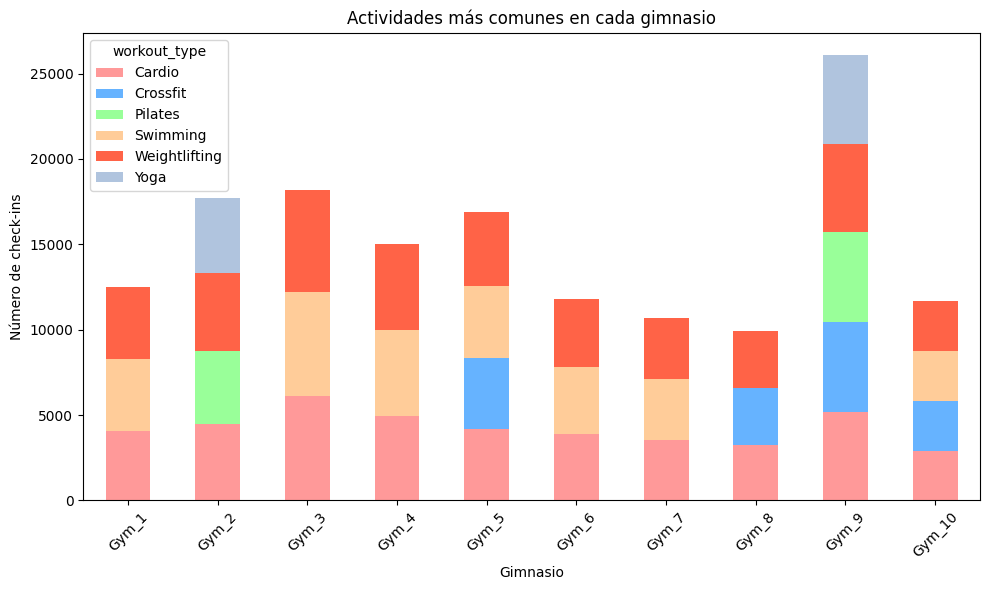

In [ ]:
# 1.)
# Ordenamos gym_id numéricamente
merged_df_copia['gym_id'] = pd.Categorical(
    merged_df_copia['gym_id'],
    categories=sorted(merged_df_copia['gym_id'].unique(), key=lambda x: int(x.split('_')[1])),
    ordered=True
)

# Creamos una lista de colores, uno para cada actividad
activity_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FF6347', '#B0C4DE', '#FFD700', '#8A2BE2']

# Actividades más comunes en cada gimnasio con colores personalizados
activities_per_gym = merged_df_copia.groupby(['gym_id', 'workout_type']).size().unstack(fill_value=0)
activities_per_gym = activities_per_gym.reindex(merged_df_copia['gym_id'].cat.categories)  # Asegurar el orden correcto

# Graficar las actividades más comunes en cada gimnasio
activities_per_gym.plot(kind='bar', stacked=True, figsize=(10, 6), color=activity_colors)

plt.title('Actividades más comunes en cada gimnasio')
plt.xlabel('Gimnasio')
plt.ylabel('Número de check-ins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Podemos observar que solo hay dos gimnasios que ofrecen Pilates y Yoga. Tambien, vemos que 4 ofrecen Crossfit y que la mayoria de los gimnasios tienen piscinas.
Ademas podemos observar que todos los gimnasios ofrecen Cardio y Weightlifting.

## 4. PREFERENCIAS Y COMPORTAMIENTO

### Tipos de entrenamientos más comunes

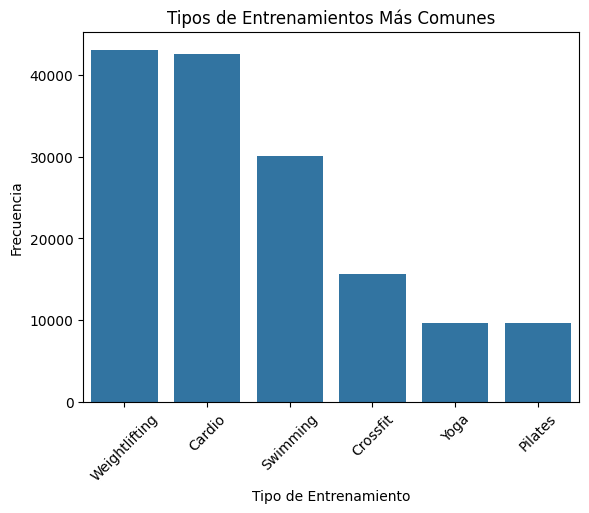

In [ ]:
sns.countplot(data=merged_df_copia, x='workout_type', order=merged_df_copia['workout_type'].value_counts().index)
plt.title('Tipos de Entrenamientos Más Comunes')
plt.xlabel('Tipo de Entrenamiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Los entrenamientos mas populares son Weightlifting y Cardio, mientras el Yoga y Pilates son menos comunes.

### Cuántos deportes hacen los usuarios
---



In [ ]:
# VALUE COUNTS
workout_counts = merged_df_copia['workout_type'].value_counts()
print(workout_counts )

workout_type
Weightlifting    43120
Cardio           42545
Swimming         30047
Crossfit         15689
Yoga              9572
Pilates           9571
Name: count, dtype: int64


In [ ]:
# Contamos valores únicos de 'workout_type' por usuarios
workout_unique_per_user = (
    merged_df_copia.groupby('workout_type')['user_id']
    .nunique()
    .reset_index(name='unique_users')
)

# Contamos el total de ocurrencias de cada 'workout_type'
workout_counts = merged_df_copia['workout_type'].value_counts().reset_index(name='total_counts')
workout_counts.columns = ['workout_type', 'total_counts']

# Unimos ambos resultados en un solo DataFrame
workout_summary = pd.merge(workout_counts, workout_unique_per_user, on='workout_type')

# Mostramos el resumen
workout_summary

,workout_type,total_counts,unique_users
0,Weightlifting,43120,4878
1,Cardio,42545,4860
2,Swimming,30047,3382
3,Crossfit,15689,1799
4,Yoga,9572,1085
5,Pilates,9571,1086


In [ ]:
# Calculamos la cantidad de deportes únicos realizados por cada usuario
users_workouts_distribution = (
    merged_df_copia.groupby('user_id')['workout_type']
    .nunique()
    .reset_index(name='unique_workout_types')
)

# Contamos cuántos usuarios realizan más de 1, 2, 3, 4 o 5 deportes
workout_counts = users_workouts_distribution['unique_workout_types'].value_counts().sort_index()

# Filtramos los usuarios según la cantidad de deportes realizados
users_more_than_1 = users_workouts_distribution[users_workouts_distribution['unique_workout_types'] > 1].shape[0]
users_more_than_2 = users_workouts_distribution[users_workouts_distribution['unique_workout_types'] > 2].shape[0]
users_more_than_3 = users_workouts_distribution[users_workouts_distribution['unique_workout_types'] > 3].shape[0]
users_more_than_4 = users_workouts_distribution[users_workouts_distribution['unique_workout_types'] > 4].shape[0]
users_more_than_5 = users_workouts_distribution[users_workouts_distribution['unique_workout_types'] > 5].shape[0]

# Mostramos el resultado
distribution_summary = {
    "Más de 1 deporte": users_more_than_1,
    "Más de 2 deportes": users_more_than_2,
    "Más de 3 deportes": users_more_than_3,
    "Más de 4 deportes": users_more_than_4,
    "Más de 5 deportes": users_more_than_5
}

distribution_summary

{'Más de 1 deporte': 4901,
 'Más de 2 deportes': 4794,
 'Más de 3 deportes': 1867,
 'Más de 4 deportes': 566,
 'Más de 5 deportes': 0}

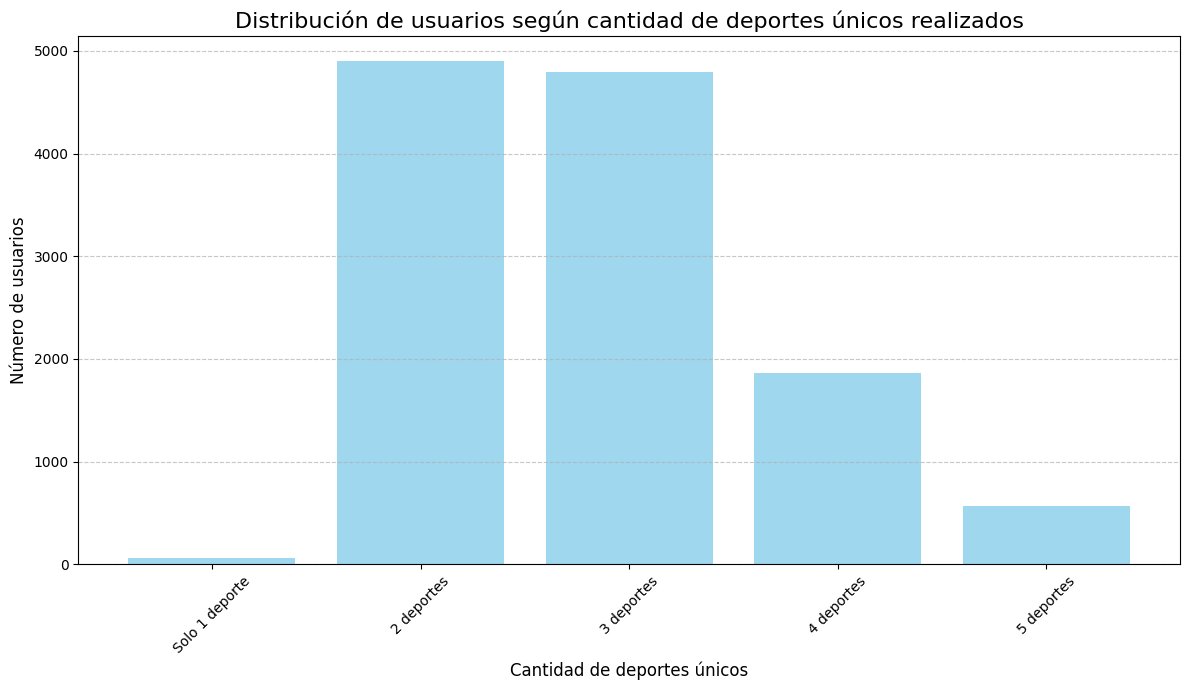

In [ ]:
import matplotlib.pyplot as plt

# Calcular la cantidad de deportes únicos realizados por cada usuario
users_workouts_distribution = (
    merged_df_copia.groupby('user_id')['workout_type']
    .nunique()
    .reset_index(name='unique_workout_types')
)

# Calcular el número de usuarios que hacen exactamente un solo deporte
users_one_sport = users_workouts_distribution[users_workouts_distribution['unique_workout_types'] == 1].shape[0]

# Contar cuántos usuarios realizan más de 1, 2, 3, 4 o 5 deportes
users_more_than_1 = users_workouts_distribution[users_workouts_distribution['unique_workout_types'] > 1].shape[0]
users_more_than_2 = users_workouts_distribution[users_workouts_distribution['unique_workout_types'] > 2].shape[0]
users_more_than_3 = users_workouts_distribution[users_workouts_distribution['unique_workout_types'] > 3].shape[0]
users_more_than_4 = users_workouts_distribution[users_workouts_distribution['unique_workout_types'] > 4].shape[0]

# Crear un resumen para la distribución incluyendo "Solo 1 deporte"
distribution_summary = {
    "Solo 1 deporte": users_one_sport,
    "2 deportes": users_more_than_1,
    "3 deportes": users_more_than_2,
    "4 deportes": users_more_than_3,
    "5 deportes": users_more_than_4}

# Dibujar el gráfico actualizado
plt.figure(figsize=(12, 7))
plt.bar(distribution_summary.keys(), distribution_summary.values(), color='skyblue', alpha=0.8)
plt.title('Distribución de usuarios según cantidad de deportes únicos realizados', fontsize=16)
plt.xlabel('Cantidad de deportes únicos', fontsize=12)
plt.ylabel('Número de usuarios', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los usuarios por lo general participan en 2 a 3 deportes.

### Tipo de entrenamiento por género

In [ ]:
# Agrupamos por Genero
grouped_gender_workout= merged_df_copia.groupby(['gender'])['workout_type'].value_counts()
print(grouped_gender_workout)

gender  workout_type 
F       Weightlifting    18832
        Cardio           18356
        Swimming         13034
        Crossfit          6659
        Yoga              4197
        Pilates           4147
M       Weightlifting    19975
        Cardio           19973
        Swimming         13982
        Crossfit          7478
        Pilates           4485
        Yoga              4475
N       Weightlifting     4313
        Cardio            4216
        Swimming          3031
        Crossfit          1552
        Pilates            939
        Yoga               900
Name: count, dtype: int64


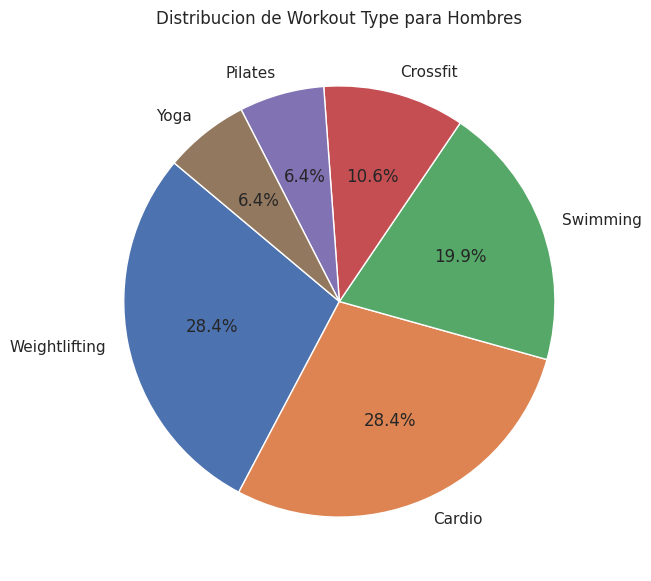

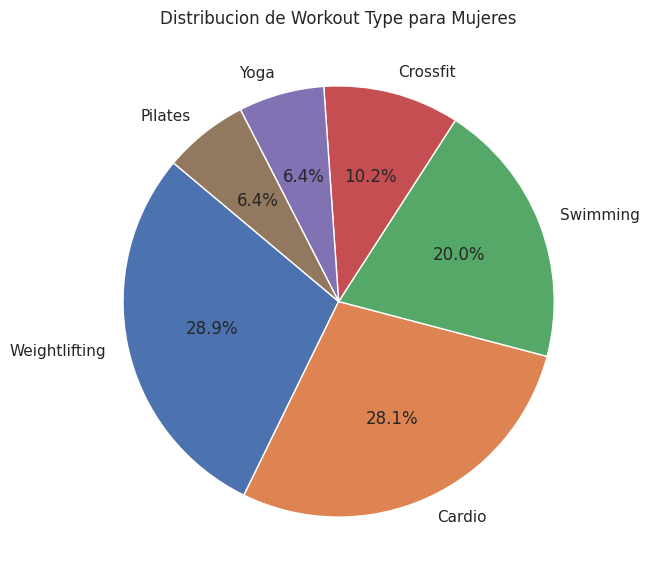

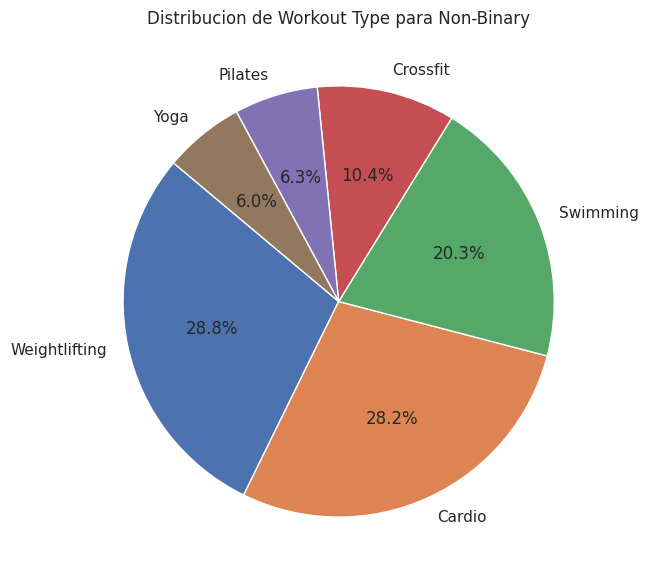

In [ ]:
# POR GENERO
gender_workout_counts = grouped_gender_workout.reset_index(name='count')

# Filtramos por genero
male_workouts = gender_workout_counts[gender_workout_counts['gender'] == 'M']
female_workouts = gender_workout_counts[gender_workout_counts['gender'] == 'F']
nonbinary_workouts = gender_workout_counts[gender_workout_counts['gender'] == 'N']


sns.set(style="whitegrid")
plt.figure(figsize=(7, 7))
plt.pie(male_workouts['count'], labels=male_workouts['workout_type'], autopct='%1.1f%%', startangle=140)
plt.title('Distribucion de Workout Type para Hombres')
plt.show()


sns.set(style="whitegrid")
plt.figure(figsize=(7, 7))
plt.pie(female_workouts['count'], labels=female_workouts['workout_type'], autopct='%1.1f%%', startangle=140)
plt.title('Distribucion de Workout Type para Mujeres')
plt.show()


sns.set(style="whitegrid")
plt.figure(figsize=(7, 7))
plt.pie(nonbinary_workouts['count'], labels=nonbinary_workouts['workout_type'], autopct='%1.1f%%', startangle=140)
plt.title('Distribucion de Workout Type para Non-Binary')
plt.show()

Entre los generos no hay una preferencia de Workout_Type.

## 5. RENDIMIENTO DE INSTALACIONES

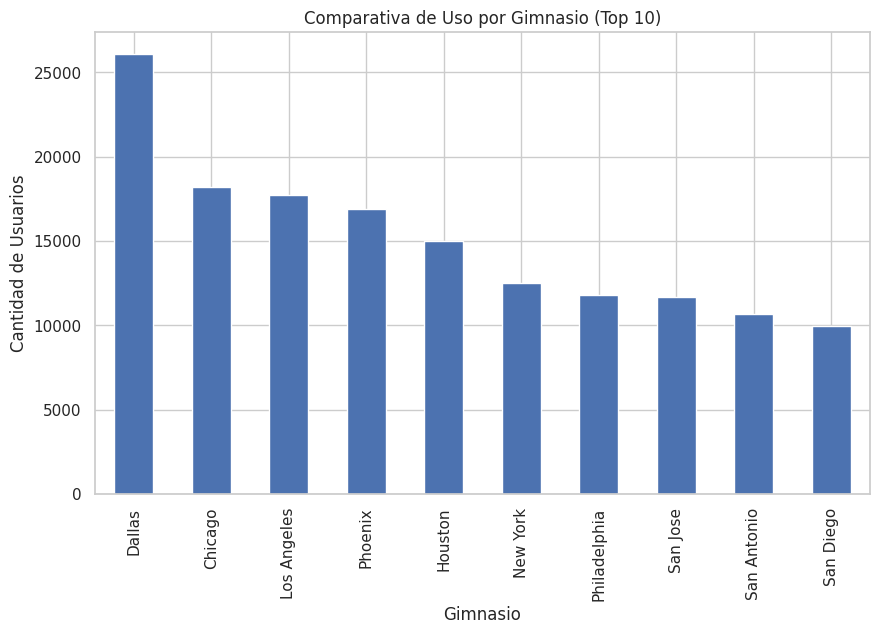

In [ ]:
# Comparativa de gimnasios por ubicación
gym_location_counts = merged_df_copia.groupby('gym_location')['user_id'].count().sort_values(ascending=False).head(10)
gym_location_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Comparativa de Uso por Gimnasio (Top 10)')
plt.xlabel('Gimnasio')
plt.ylabel('Cantidad de Usuarios')
plt.show()


# V. Análisis de tendencias temporales

### Análisis del comportamiento teniendo en cuenta las estaciones del año.




Teniendo en cuenta que en los Estados Unidos, las estaciones del año son:

* Primavera: de marzo a mayo.

* Verano: de junio a agosto.

* Otoño: de septiembre a noviembre.

* Invierno: de diciembre a febrero.


Se ha decidido agrupar de esa manera los datos.

1. Por suscripciones
Analizar temporalmente las suscripciones.

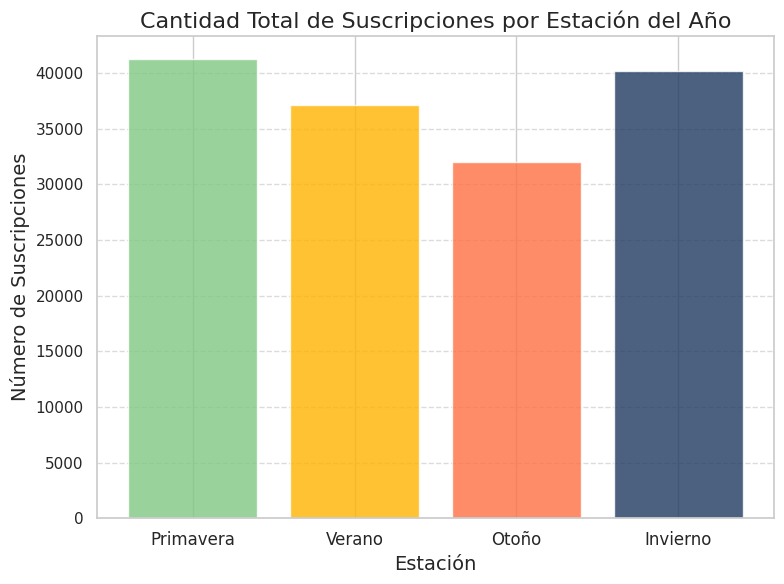

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarnos de que 'sign_up_date' sea de tipo datetime
merged_df_copia['sign_up_date'] = pd.to_datetime(merged_df_copia['sign_up_date'])

# Creamos una columna de 'estación' basada en el mes de 'sign_up_date'
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

# Asignamos la estación a cada registro
merged_df_copia['season'] = merged_df_copia['sign_up_date'].dt.month.apply(assign_season)

# Agrupamos por estación para contar el número de suscripciones por estación
season_subscription_counts = merged_df_copia['season'].value_counts()

# Asegurarnos de que las estaciones estén en el orden correcto
season_order = ['Primavera', 'Verano', 'Otoño', 'Invierno']
season_subscription_counts = season_subscription_counts[season_order]

# Colores representativos de cada estación
season_colors = {
    'Primavera': '#81C784',  # Verde suave
    'Verano': '#FFB300',     # Amarillo dorado
    'Otoño': '#FF7043',      # Naranja cálido
    'Invierno': '#1E3A5F'    # Azul oscuro
}

# Creamos una figura con un tamaño atractivo
plt.figure(figsize=(8, 6))

# Creamos un gráfico de barras con colores representativos de cada estación
plt.bar(season_subscription_counts.index, season_subscription_counts.values,
        color=[season_colors[season] for season in season_subscription_counts.index], alpha=0.8)

# Ajustamos títulos y etiquetas
plt.title('Cantidad Total de Suscripciones por Estación del Año', fontsize=16)
plt.xlabel('Estación', fontsize=14)
plt.ylabel('Número de Suscripciones', fontsize=14)

# Mejoramos la visualización de las etiquetas
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostramos el gráfico
plt.show()


Observamos que en Otoño hay un menor numero de suscripciones y en la primavera es la estacion del año donde hay mas suscripciones.

2. Registro de visitas

Cantidad total de check-ins por estación:
season
Invierno     26638
Primavera    46041
Verano       51225
Otoño        26640
Name: count, dtype: int64


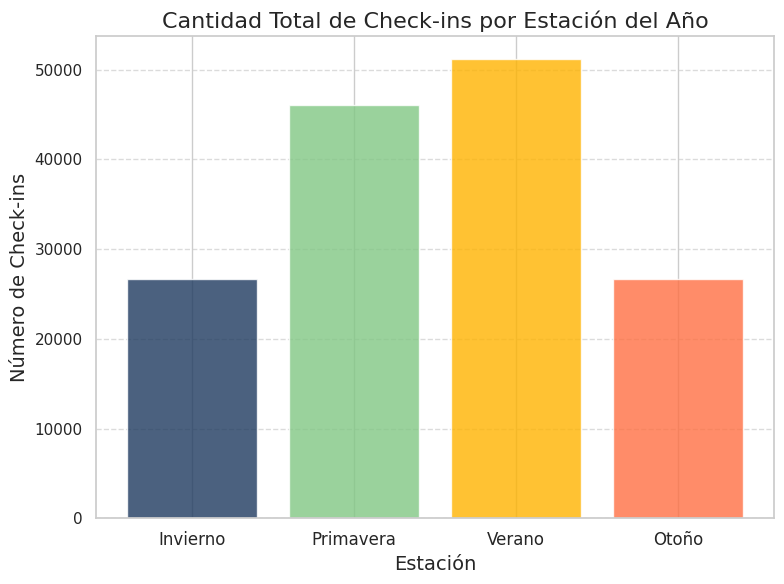

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarnos de que 'checkin_time' sea de tipo datetime
merged_df_copia['checkin_time'] = pd.to_datetime(merged_df_copia['checkin_time'])

# Creamos una columna de 'estación' basada en el mes de 'checkin_time'
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

# Asignamos la estación a cada registro
merged_df_copia['season'] = merged_df_copia['checkin_time'].dt.month.apply(assign_season)

# Contamos la cantidad total de check-ins por estación
season_checkin_counts = merged_df_copia['season'].value_counts().reindex(['Invierno', 'Primavera', 'Verano', 'Otoño'])

# Mostramos los resultados
print("Cantidad total de check-ins por estación:")
print(season_checkin_counts)

# Colores representativos de cada estación
season_colors = {
    'Primavera': '#81C784',  # Verde suave
    'Verano': '#FFB300',     # Amarillo dorado
    'Otoño': '#FF7043',      # Naranja cálido
    'Invierno': '#1E3A5F'    # Azul oscuro
}

# Creamos una figura con un tamaño atractivo
plt.figure(figsize=(8, 6))

# Creamos un gráfico de barras con colores representativos de cada estación
plt.bar(season_checkin_counts.index, season_checkin_counts.values,
        color=[season_colors[season] for season in season_checkin_counts.index], alpha=0.8)

# Ajustamos títulos y etiquetas
plt.title('Cantidad Total de Check-ins por Estación del Año', fontsize=16)
plt.xlabel('Estación', fontsize=14)
plt.ylabel('Número de Check-ins', fontsize=14)

# Mejoramos la visualización de las etiquetas
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostramos el gráfico
plt.show()


Se observa que las personas visitan mas el gimnasion durante el verano en comparacion con invierno y otoño.

## Evolución mensual de las incripciones a través del año

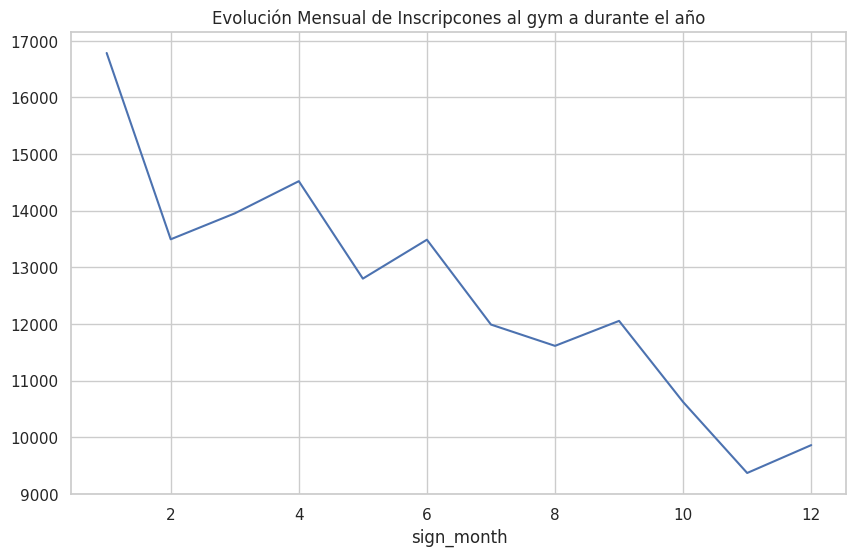

In [ ]:
monthly_activity = merged_df_copia.groupby('sign_month')['user_id'].count()
monthly_activity.plot(kind='line', figsize=(10, 6))
plt.title('Evolución Mensual de Inscripcones al gym a durante el año')
plt.show()

Se observa que las personas se inscriben mas al comienzo del año quizas por la motivacion de un nuevo año.